In [55]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations, combinations, repeat
import random


In [93]:
class Hexagram:
    def __init__(
            self,
            row_idx: int,
            col_idx: int,
            colors: tuple[str],
            line_len: int = 6,
            x_middle_gap: int = 2,
            x_gap_between_hexa: int = 10, # we calculate from the starting point in the low left corner of hexagram
            y_gap_between_hexa: int = 10,
            linewidth: float = 1.5,  # same technique
        ):
    
        self.row_idx = row_idx
        self.col_idx = col_idx
        self.colors = colors
        self.solid_broken = np.random.rand(6) > .5
        self.line_len = line_len
        self.x_middle_gap = x_middle_gap
        self.x_gap_between_hexa = x_gap_between_hexa
        self.y_gap_between_hexa = y_gap_between_hexa
        self.x_start = col_idx * x_gap_between_hexa
        self.y_start = row_idx * y_gap_between_hexa
        self.lw = linewidth

    def draw_hexagram(self, color_filter: str = None, reapeat_lines: int = 1):
        for l_idx, line in enumerate(self.solid_broken):
            y_space = (lambda x: 2.25+x if x < 3 else 2.75+x) (l_idx)
            line_color = self.colors[l_idx]
            if color_filter and color_filter != line_color:
                continue
            if line:
                for _ in range(reapeat_lines):
                    plt.plot([self.x_start, self.x_start+self.line_len],
                            [self.y_start + y_space, self.y_start + y_space], line_color, linewidth=self.lw)
            else:
                for _ in range(reapeat_lines):
                    plt.plot([self.x_start, self.x_start + self.x_middle_gap],
                            [self.y_start + y_space, self.y_start + y_space], line_color, linewidth=self.lw)
                    plt.plot([self.x_start + 2*self.x_middle_gap, self.x_start + self.line_len],
                            [self.y_start + y_space, self.y_start + y_space], line_color, linewidth=self.lw)

    def __repr__(self):
        return f'Row: {self.row_idx}. Col: {self.col_idx}. Colors: {self.colors}. Solid_broken: {self.solid_broken}'


color_data = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'forestgreen': 4,
    'deepskyblue': 5,
    'blue': 6
    }


We have 720 color combos
We have 24 rows x 30 cols = 720 total hexagrams


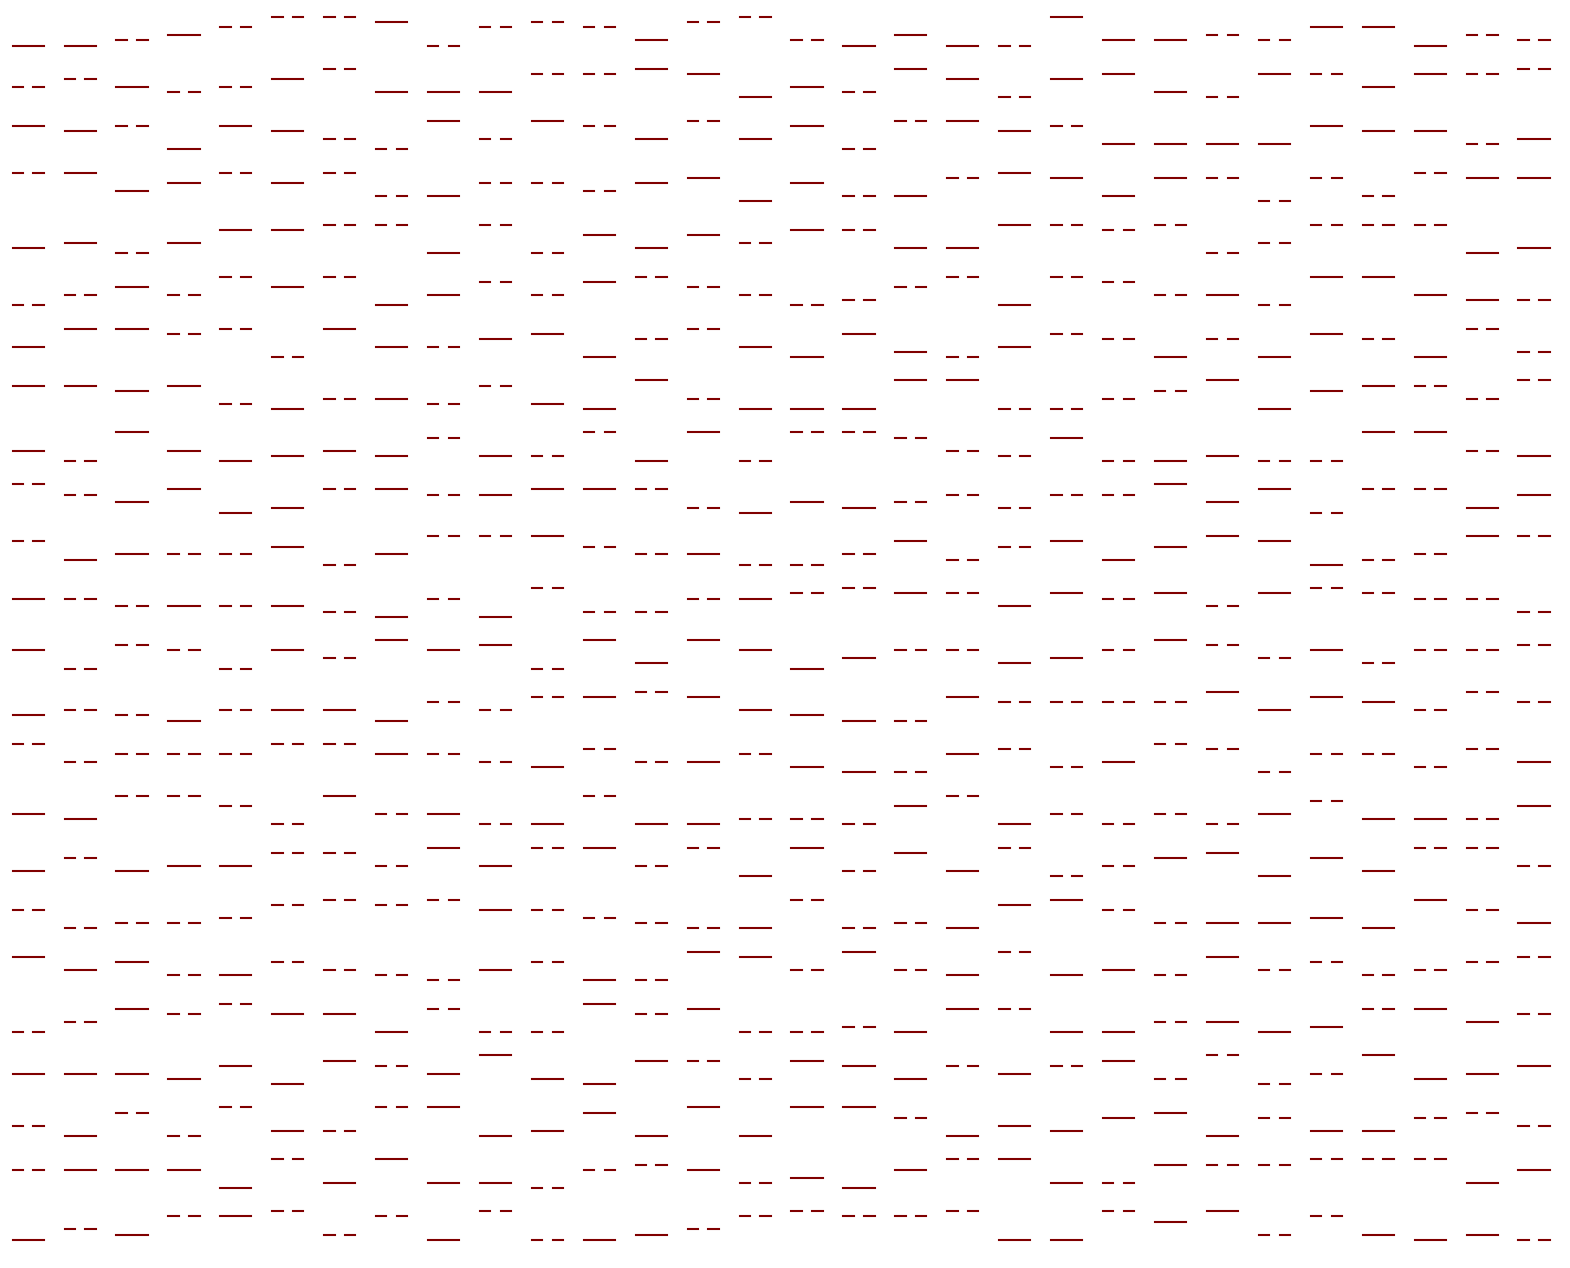

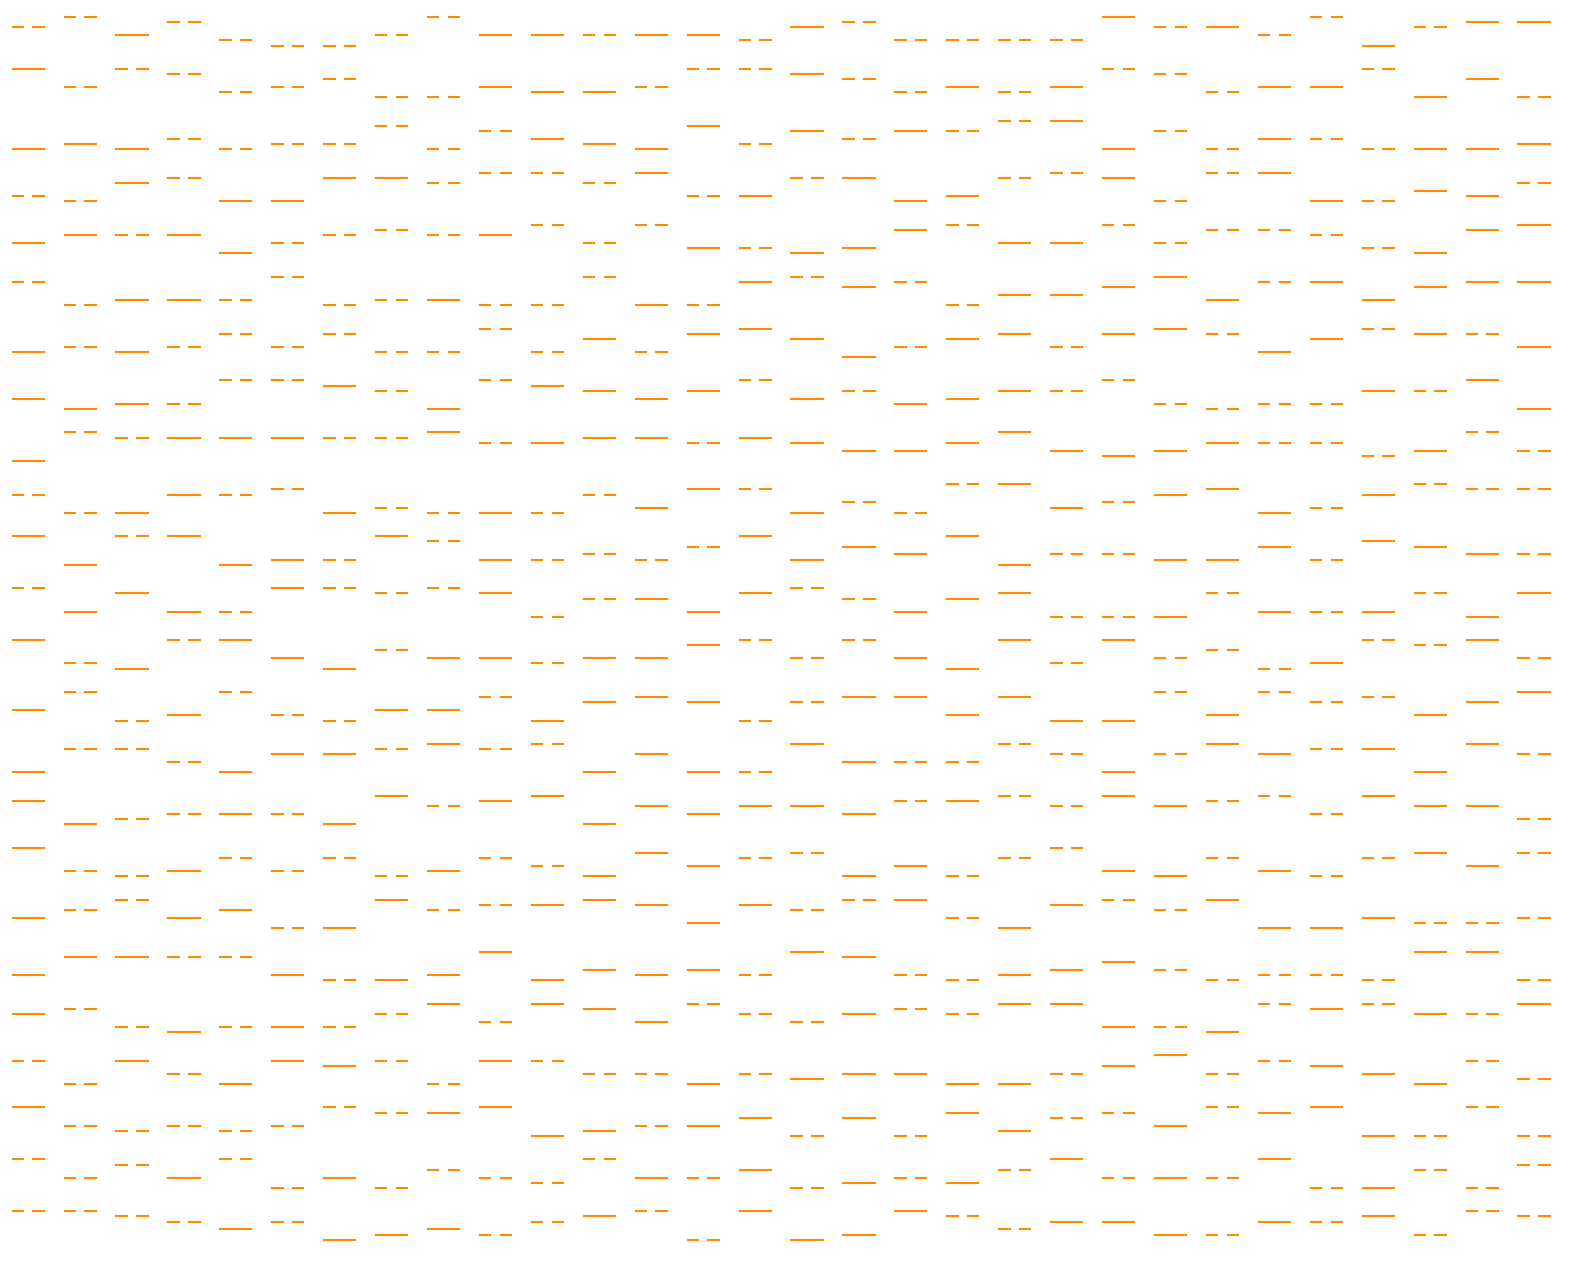

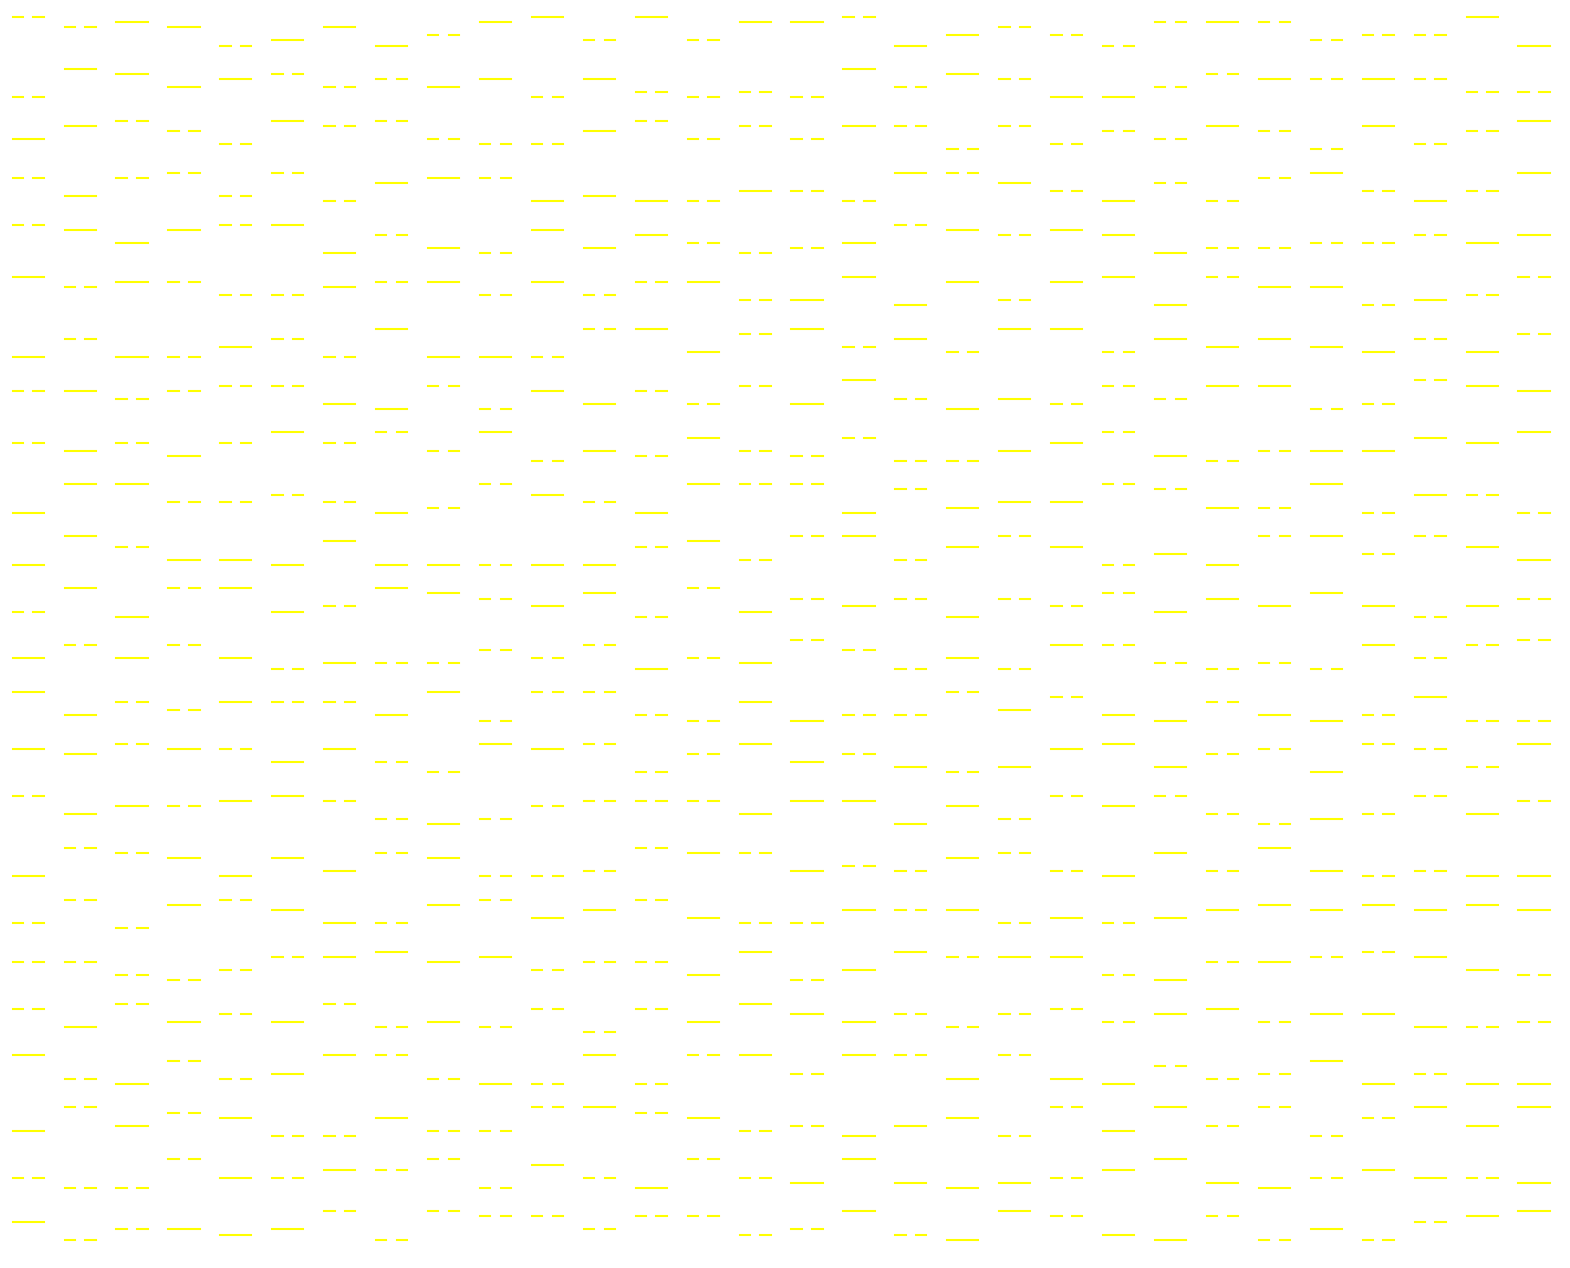

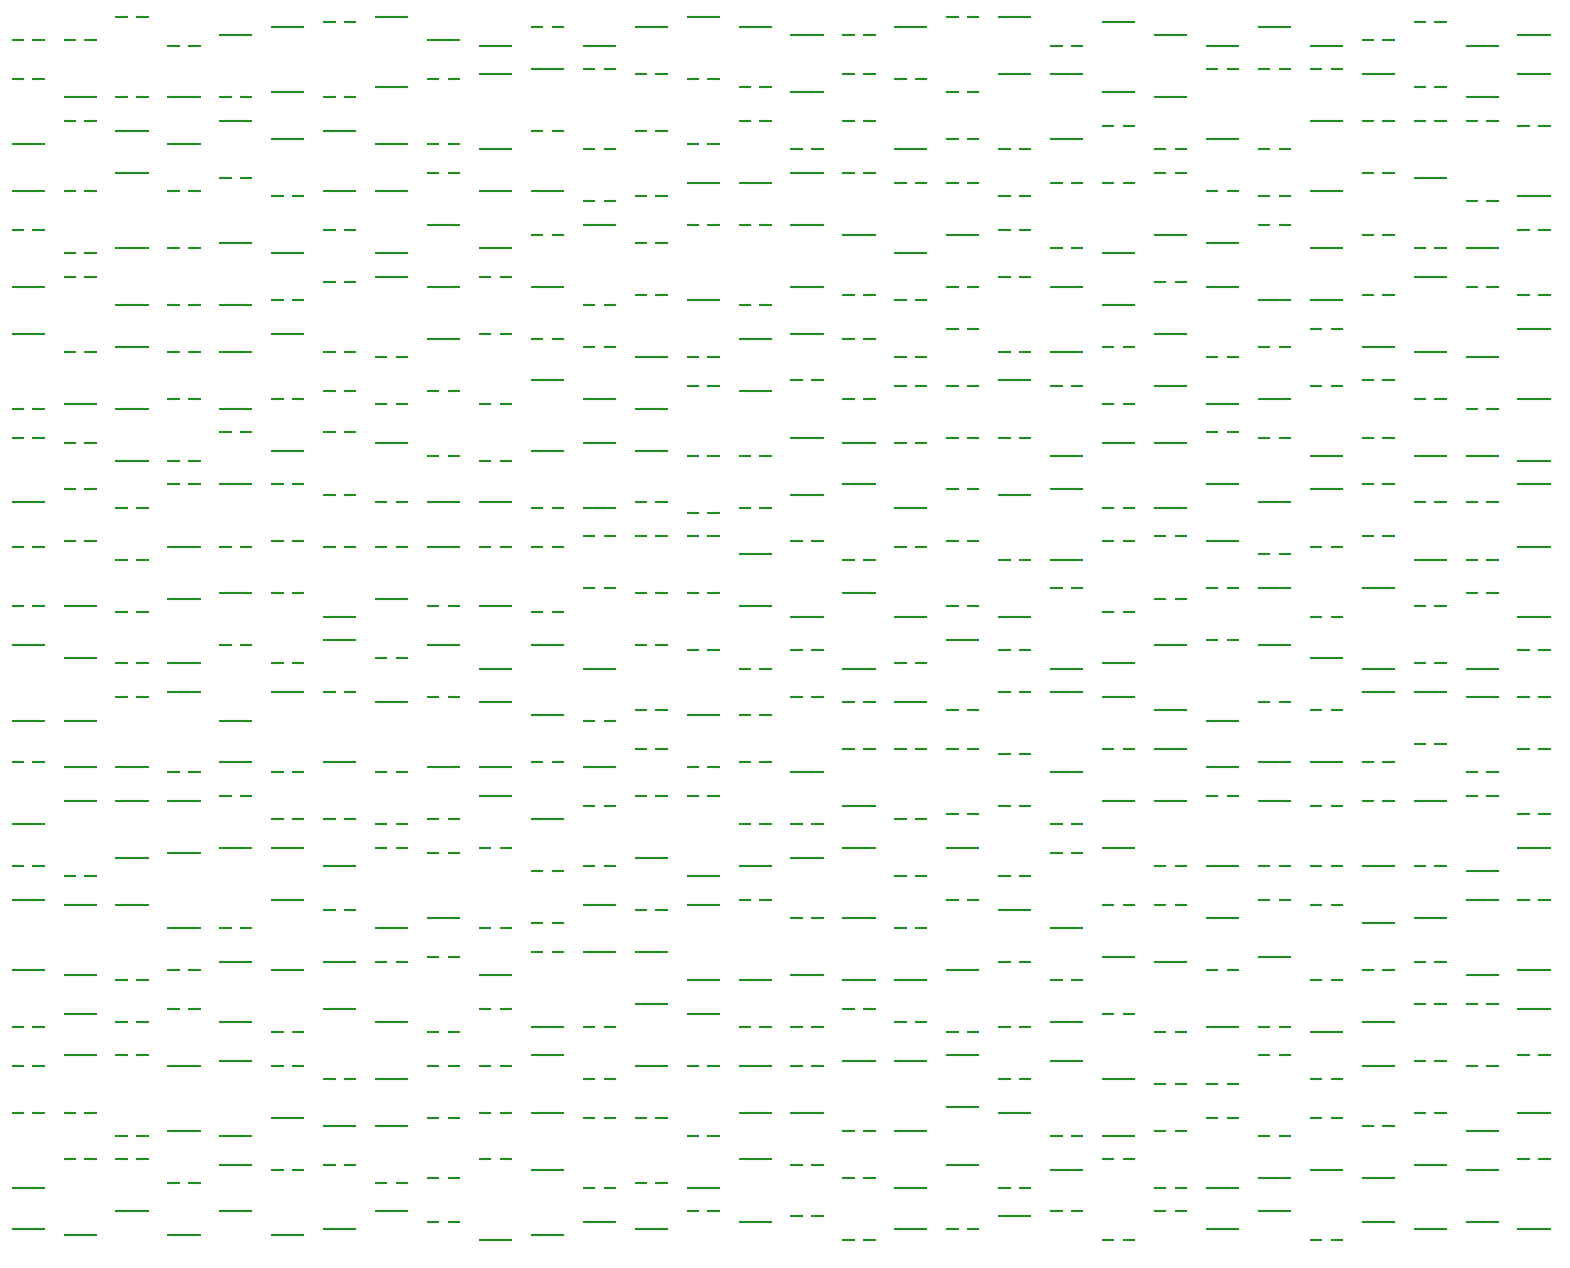

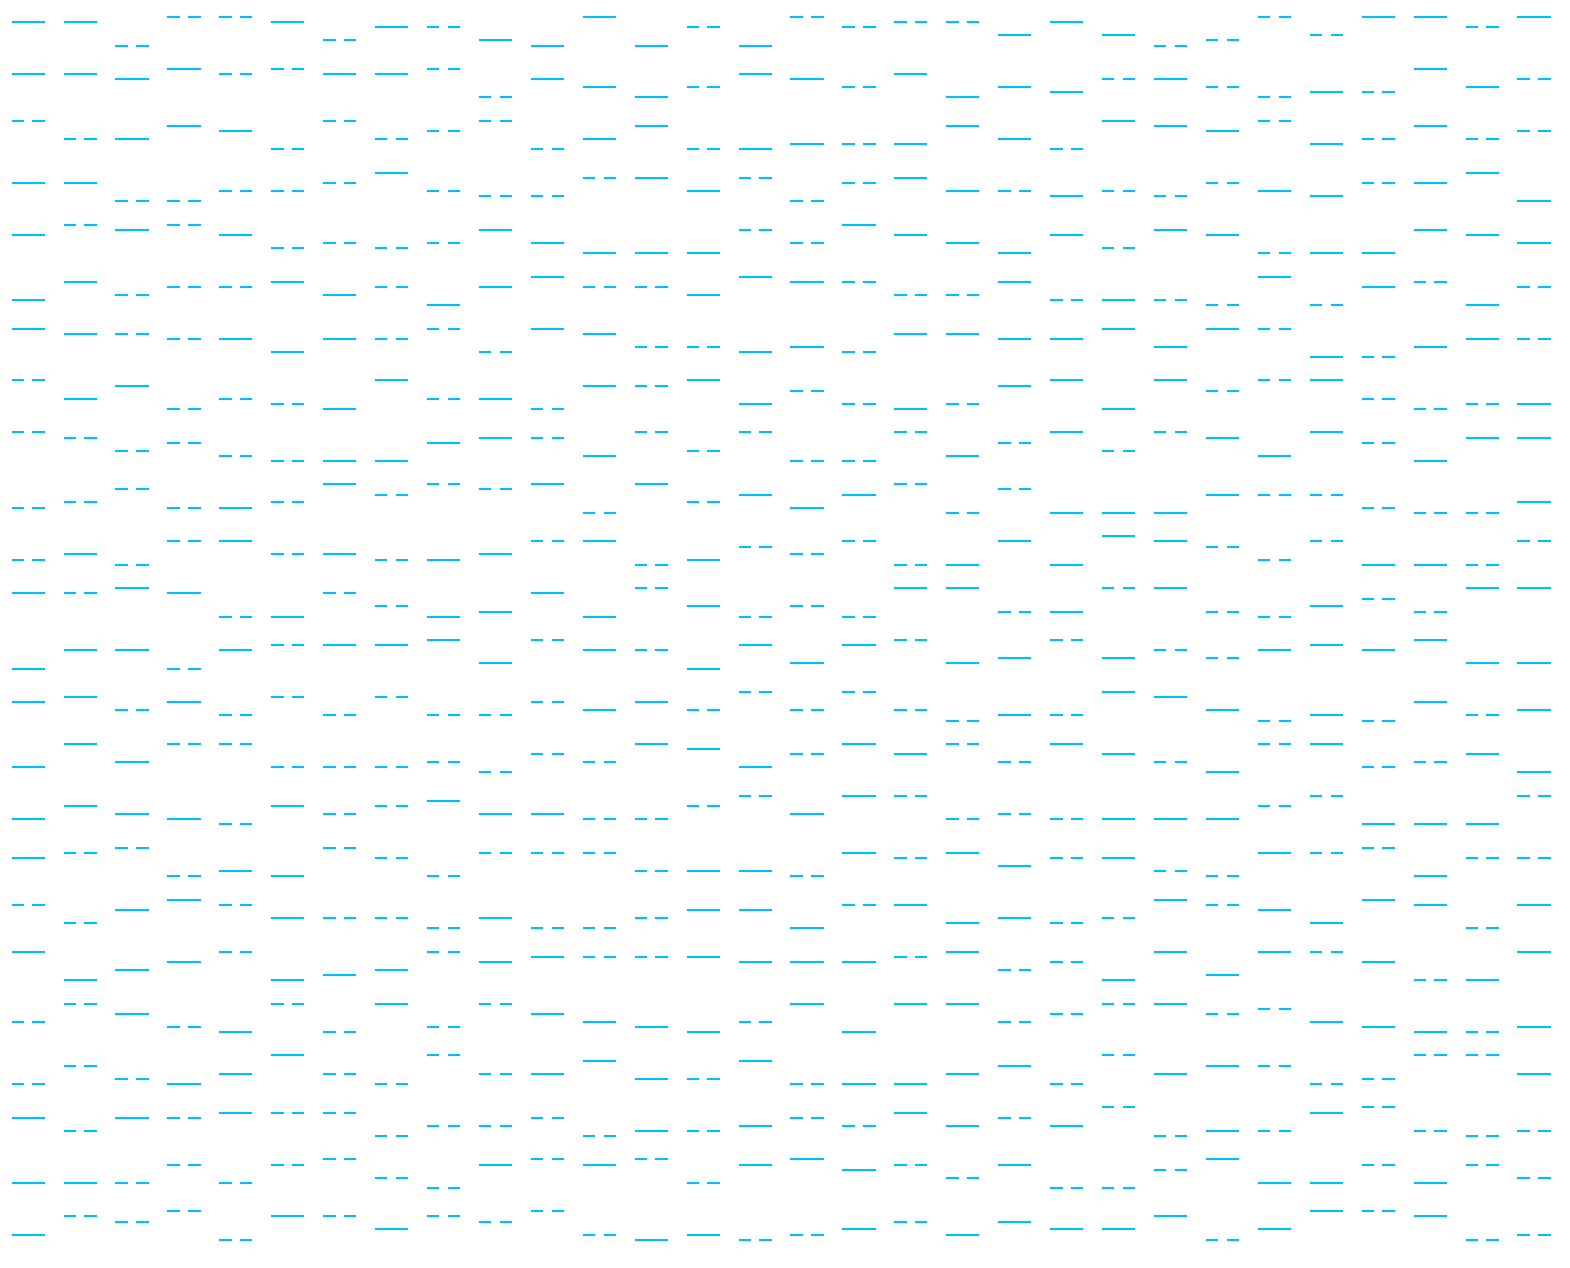

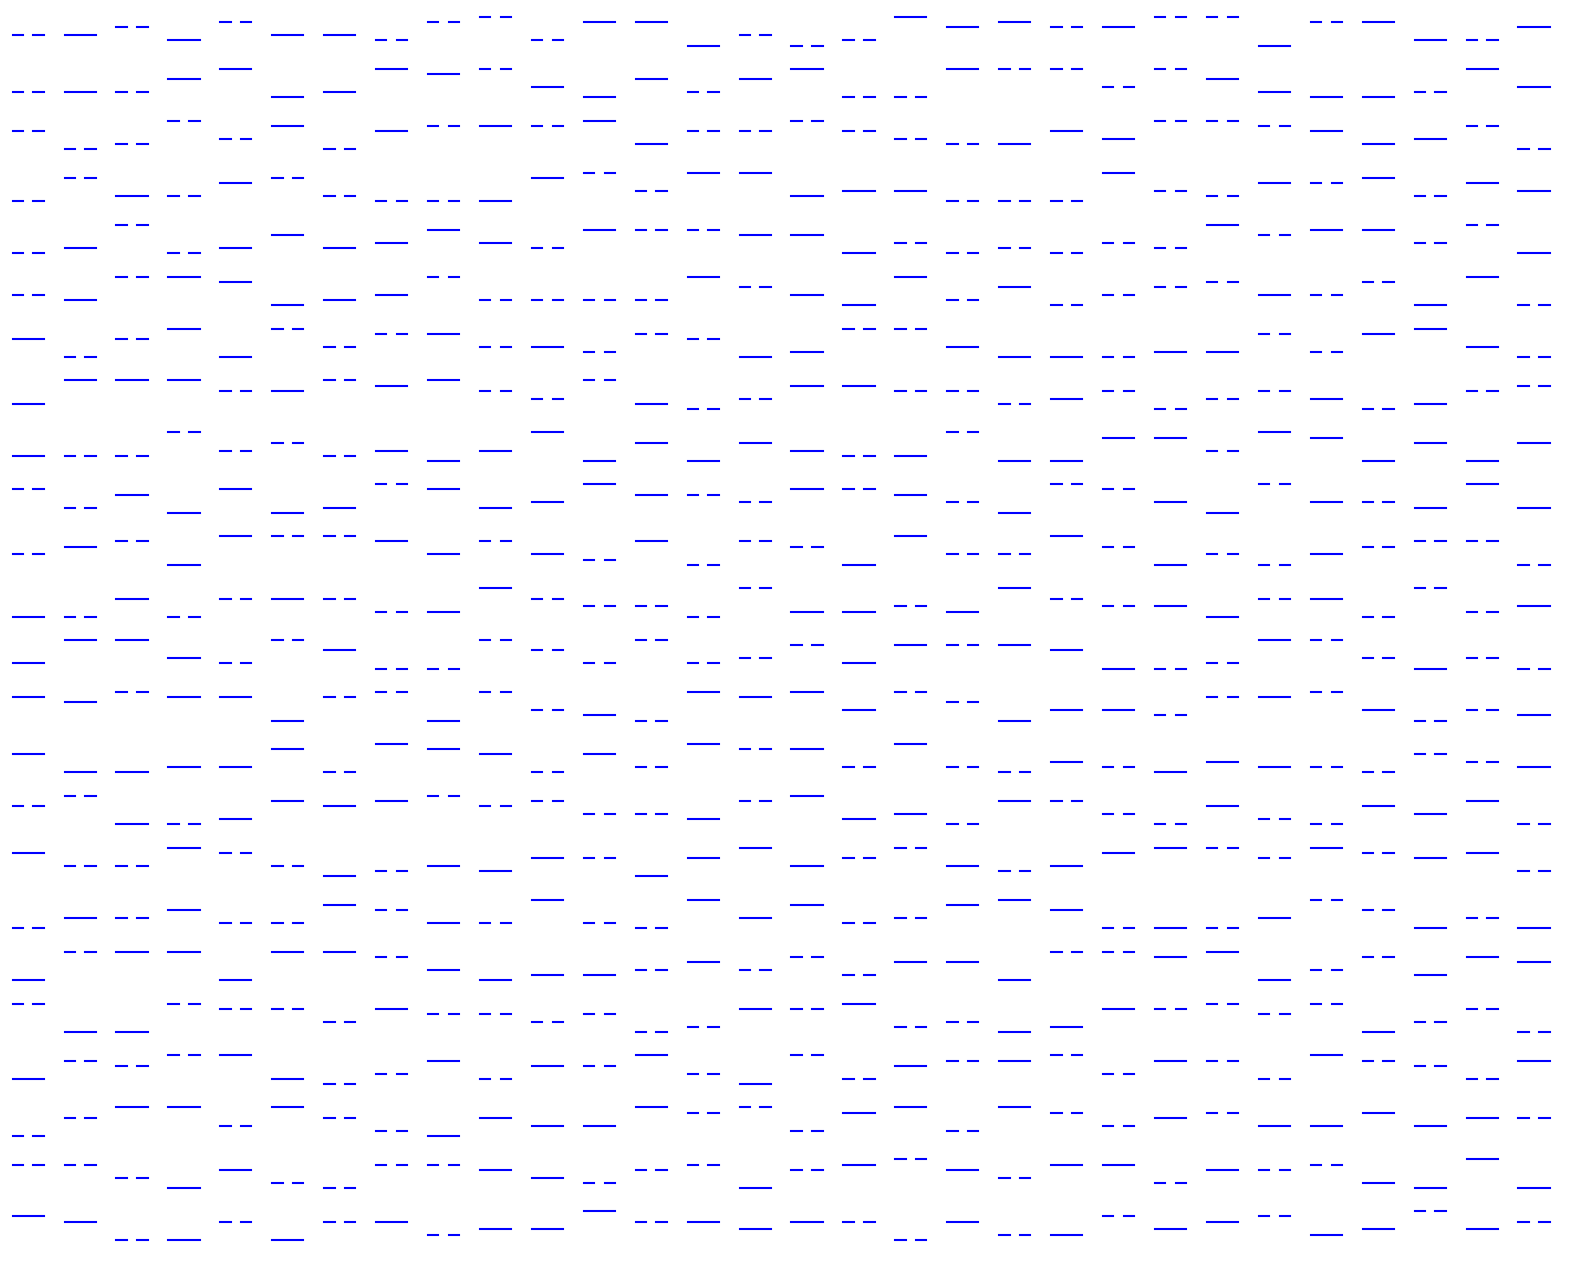

In [89]:
color_combos = list(permutations(color_data, 6))
random.shuffle(color_combos)

num_rows = 24
num_cols = 30
total_hexagram = num_rows * num_cols

print(
    f'''We have {len(color_combos)} color combos
We have {num_rows} rows x {num_cols} cols = {total_hexagram} total hexagrams''')

row_col_idx = ((row, col) for row in range(num_rows) for col in range(num_cols))

hexagrams = [
    Hexagram(
        row_idx=h_idx[0],
        col_idx=h_idx[1],
        colors=color_combos[h_full_idx],
    ) for h_full_idx, h_idx in enumerate(row_col_idx)
]

for c_idx, color in enumerate(color_data, start=1):
    for hexa in hexagrams:
        hexa.draw_hexagram(color_filter=color, reapeat_lines=1)

    plt.gca().set_aspect('equal')
    plt.axis([-.5, 298, -.5, 240])
    # plt.axis([-1, num_cols * hexa.x_gap_between_hexa+1, -1, num_rows * hexa.y_gap_between_hexa])
    plt.axis('off')
    plt.savefig(f'colorful_iching/{c_idx}_ichi_{color}.svg')
    plt.gcf().set_size_inches(20,20)
    plt.show()



In [ ]:
max_x, max_y = 100, 100
square = 10

line_len = 6
x_gap = 2

start = [0, 0]
num_rows = 24
num_cols = 30

row_col_idx = [(row, col) for row in range(num_rows) for col in range(num_cols)]

for col in range(30):
    for row in range(24):
        hexagram = np.random.rand(6) > .5
        for idx, line in enumerate(hexagram):
            y_space = (lambda x: 2.25+x if x < 3 else 2.75+x) (idx) #after each trigram we make a bigger gap in terms of y-axis
            if line:
                plt.plot([start[0]+x_gap, start[0]+x_gap+line_len], [start[1] + y_space, start[1] + y_space], 'k', linewidth=.5)
            else:
                plt.plot([start[0]+x_gap, start[0]+x_gap+2], [start[1] + y_space, start[1] + y_space], 'k', linewidth=.5)
                plt.plot([start[0]+x_gap + 4, start[0]+x_gap+6], [start[1] + y_space, start[1] + y_space], 'k', linewidth=.5)
        start[1] += 10
    start[0] += 10
    start[1] = 0

plt.gca().set_aspect('equal')
plt.axis([0, 350, 0, 250])
plt.axis('off')
plt.savefig('iching3500_color.svg')
# plt.grid()
plt.gcf().set_size_inches(18,18)
plt.show()



In [10]:
hexagram = np.random.rand(6) > .5

In [11]:
hexagram

array([ True, False,  True,  True,  True, False])

We have 720 color combos
We have 26 rows x 26 cols = 676 total hexagrams


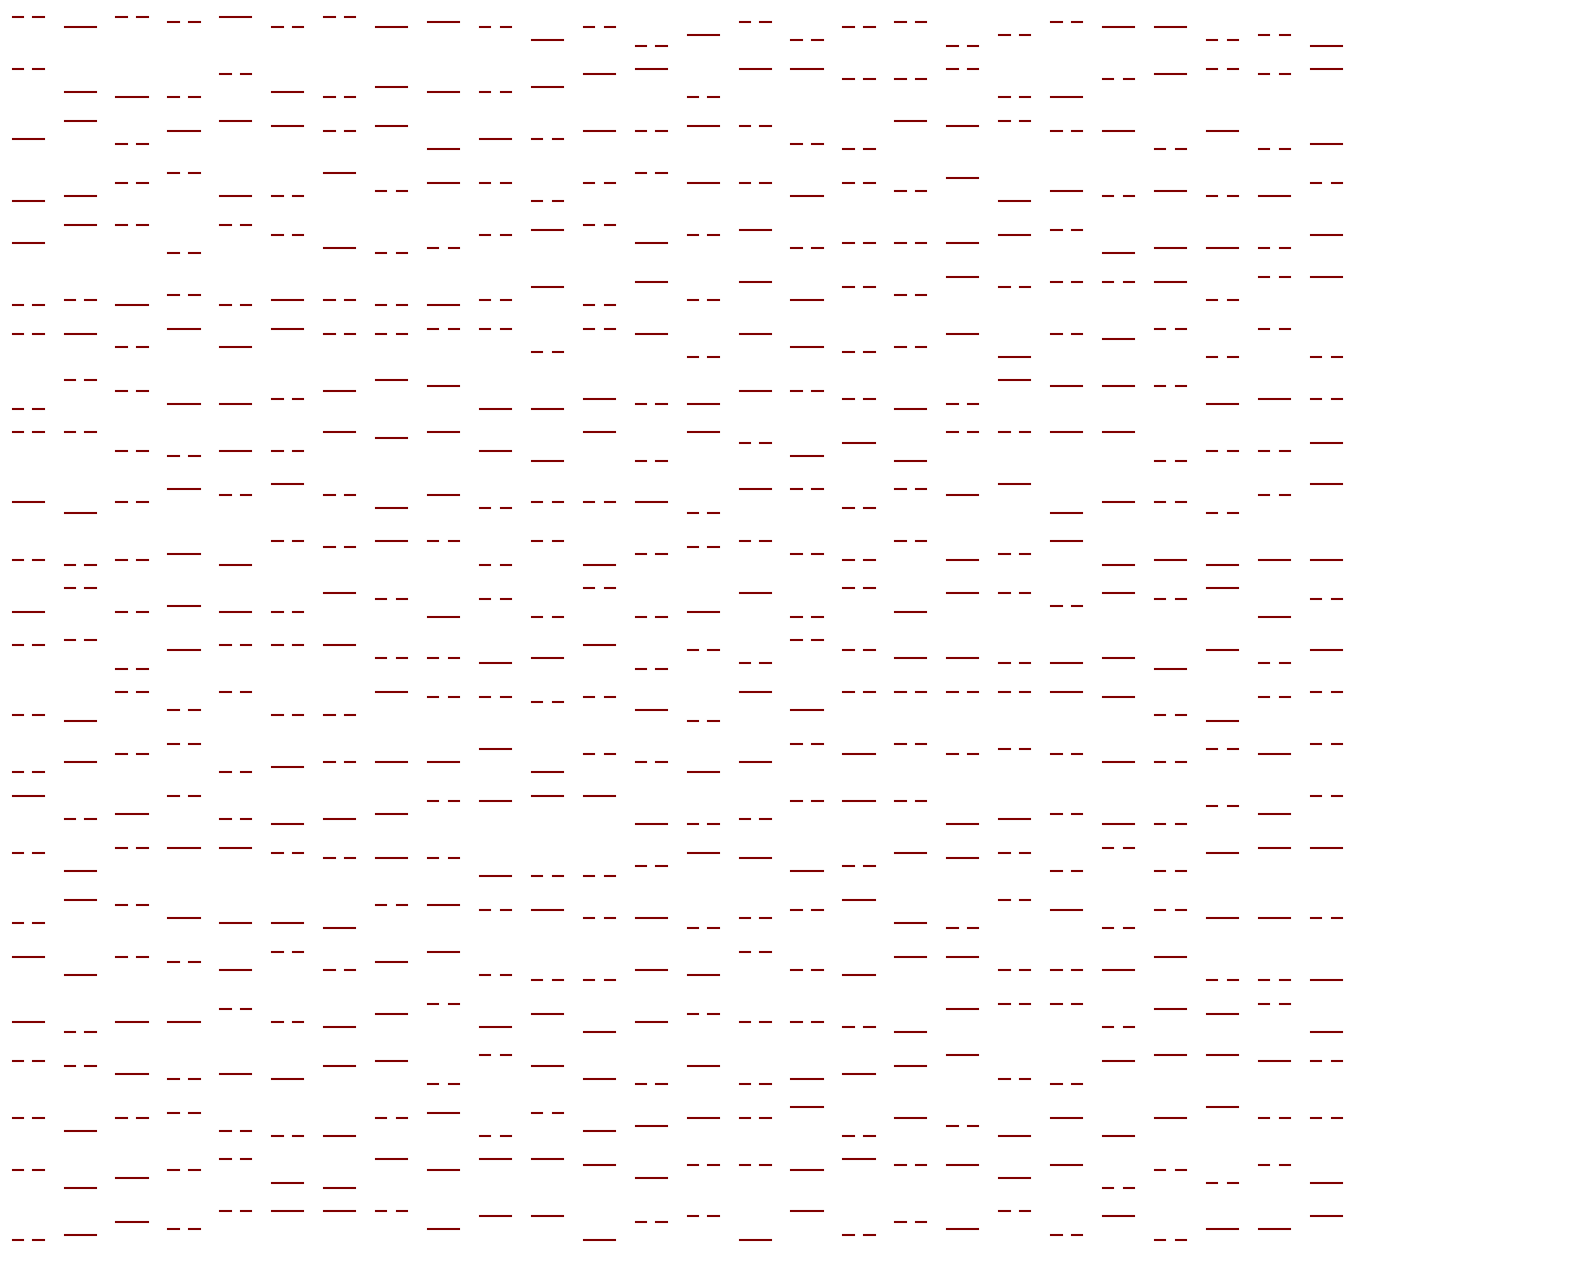

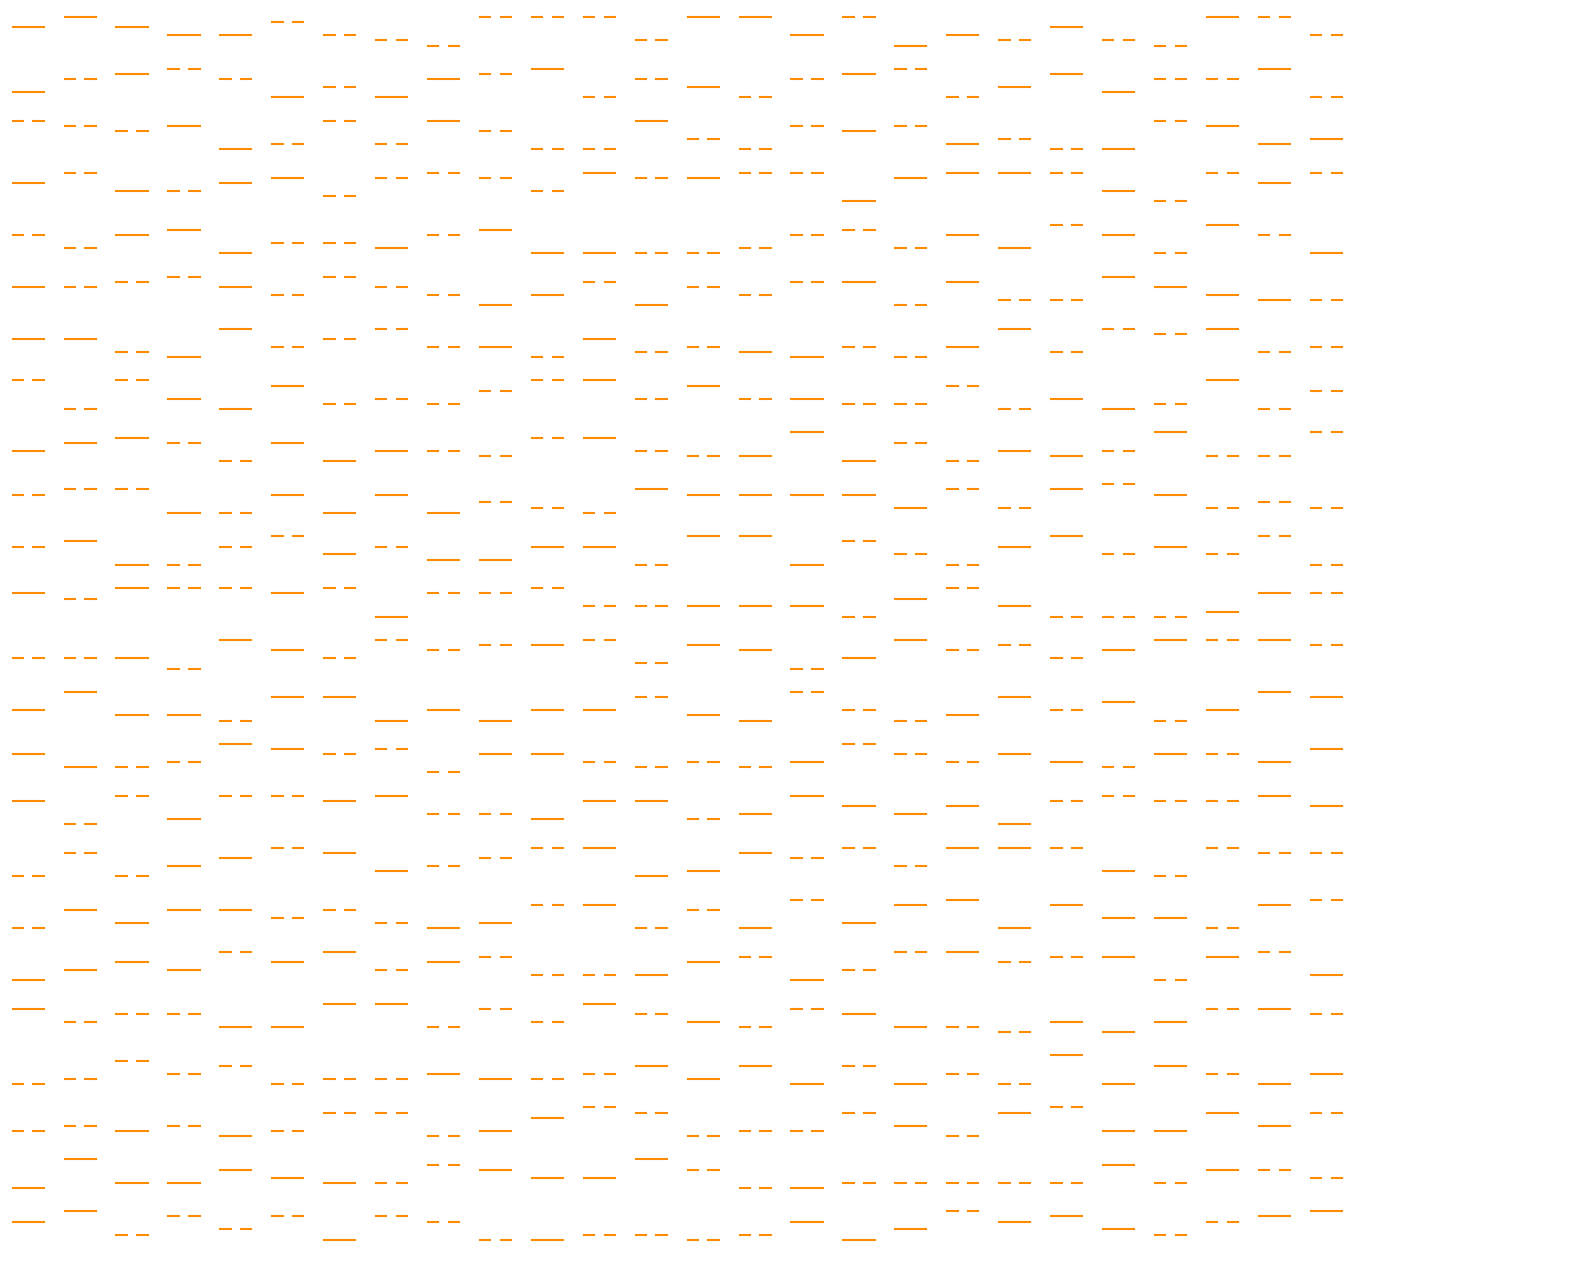

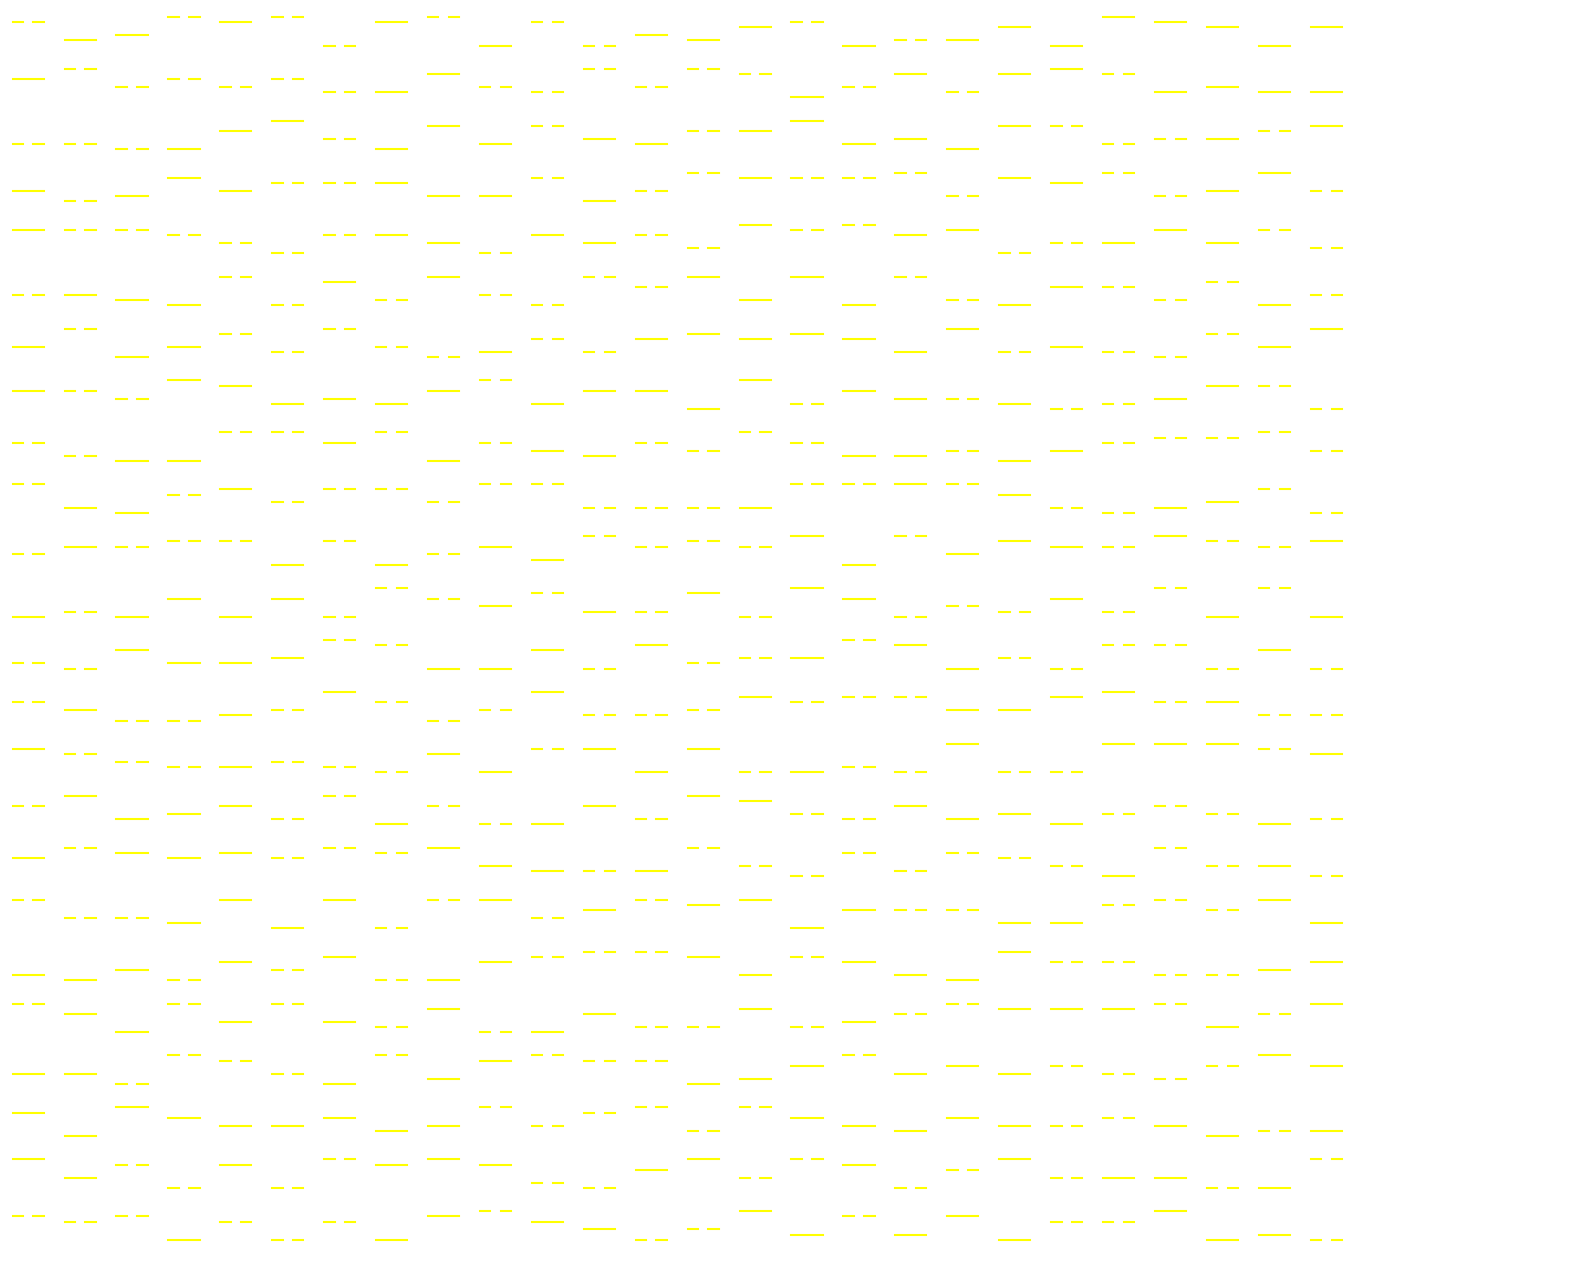

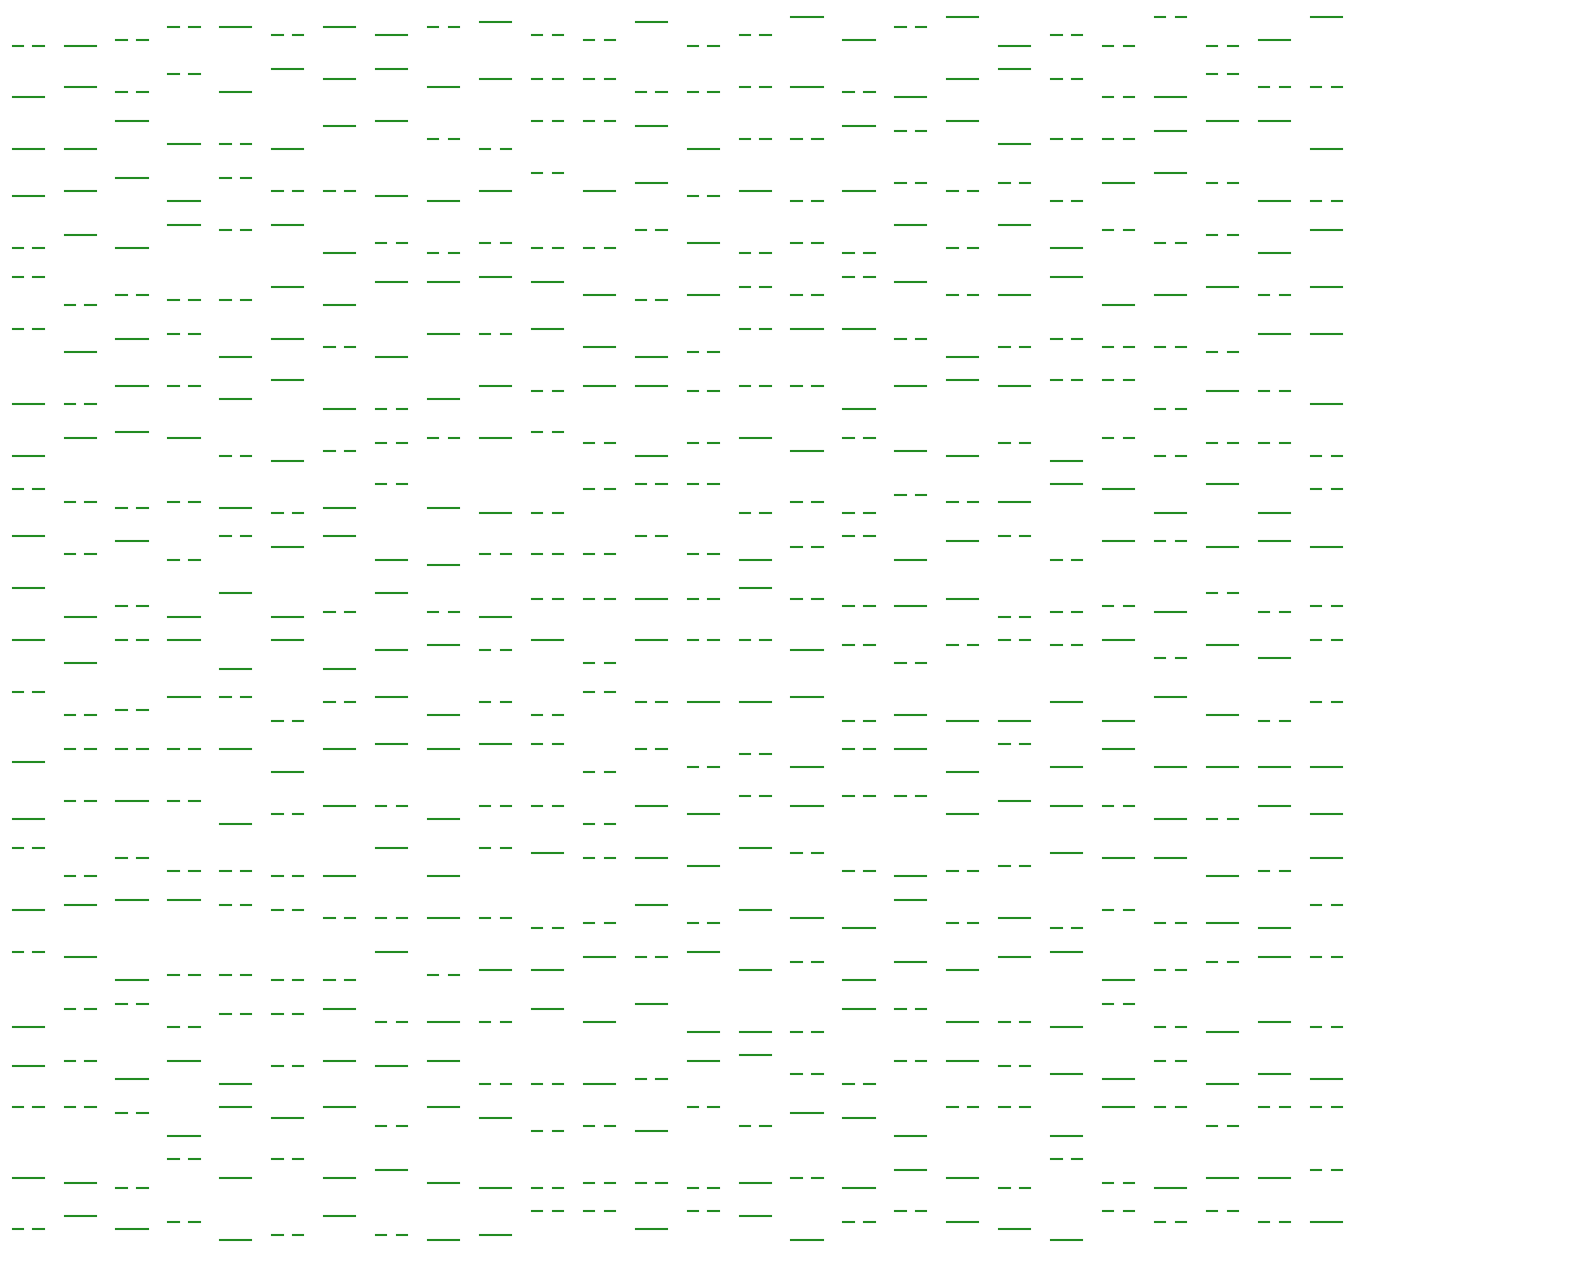

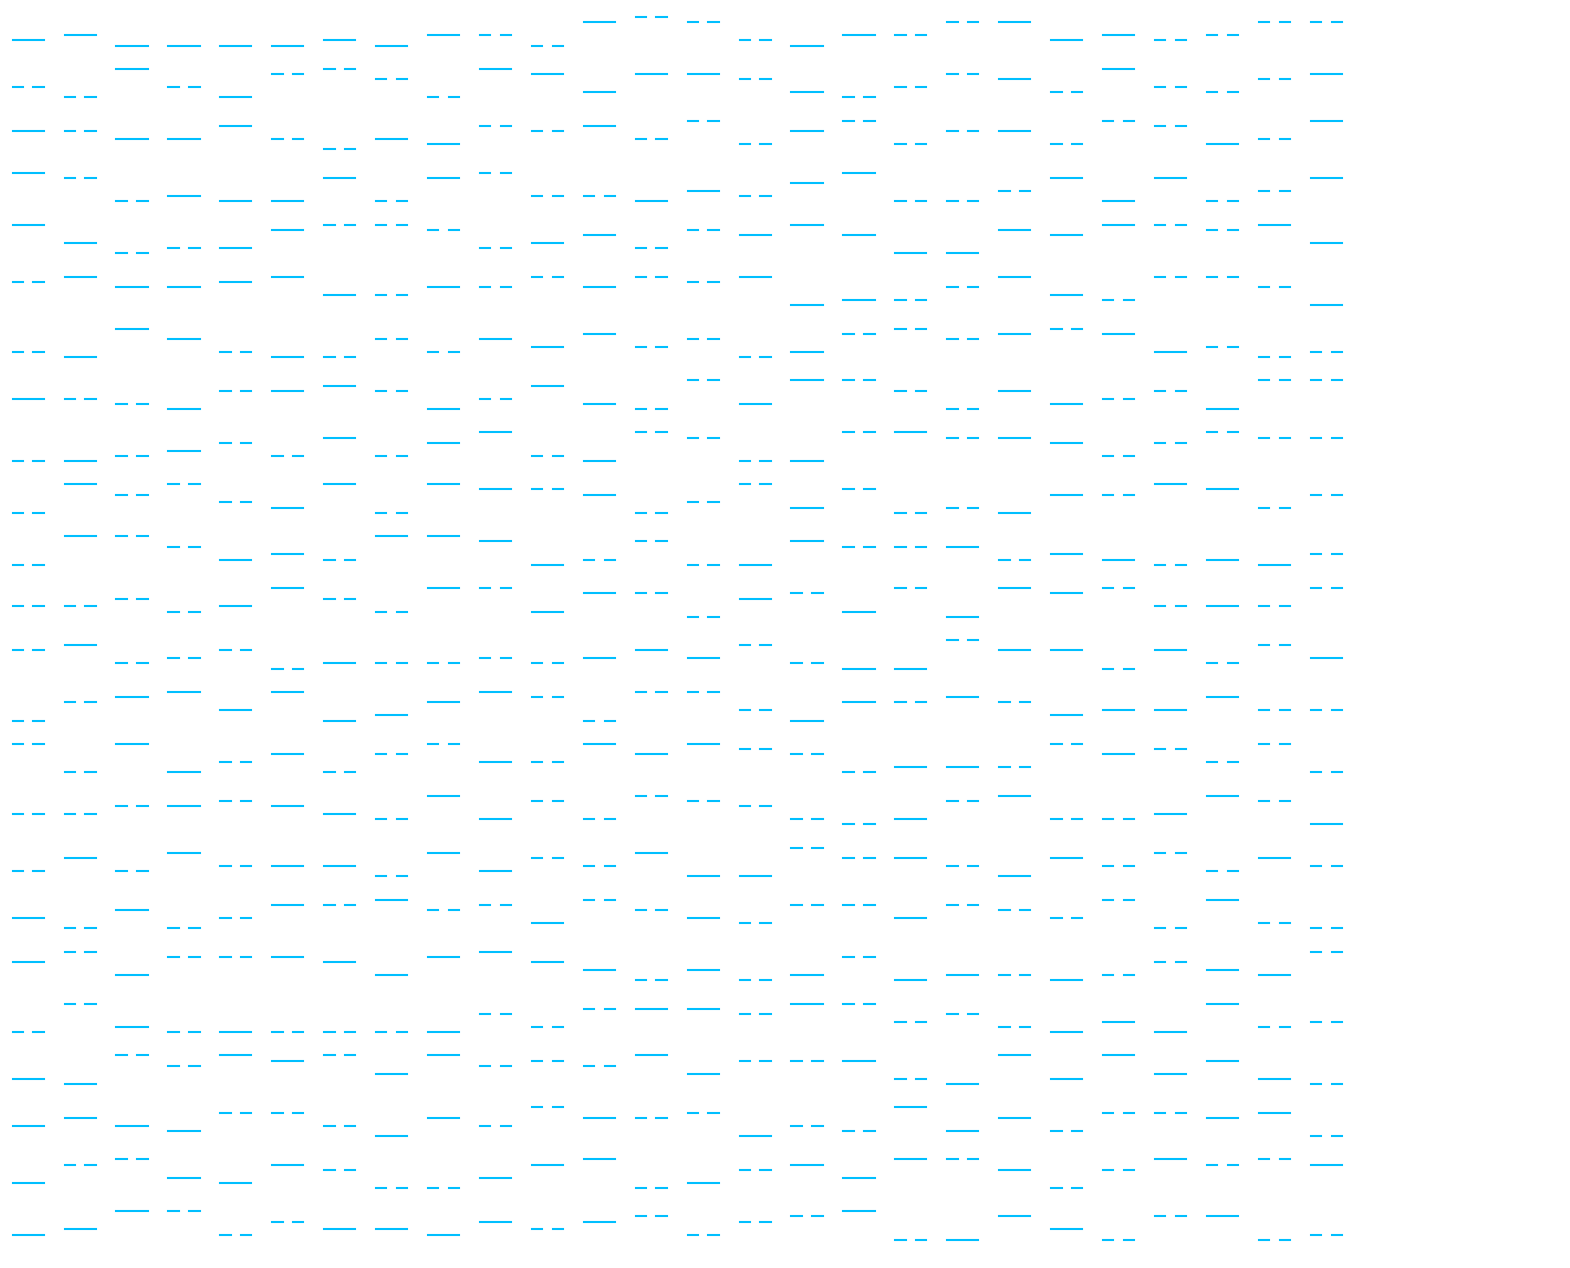

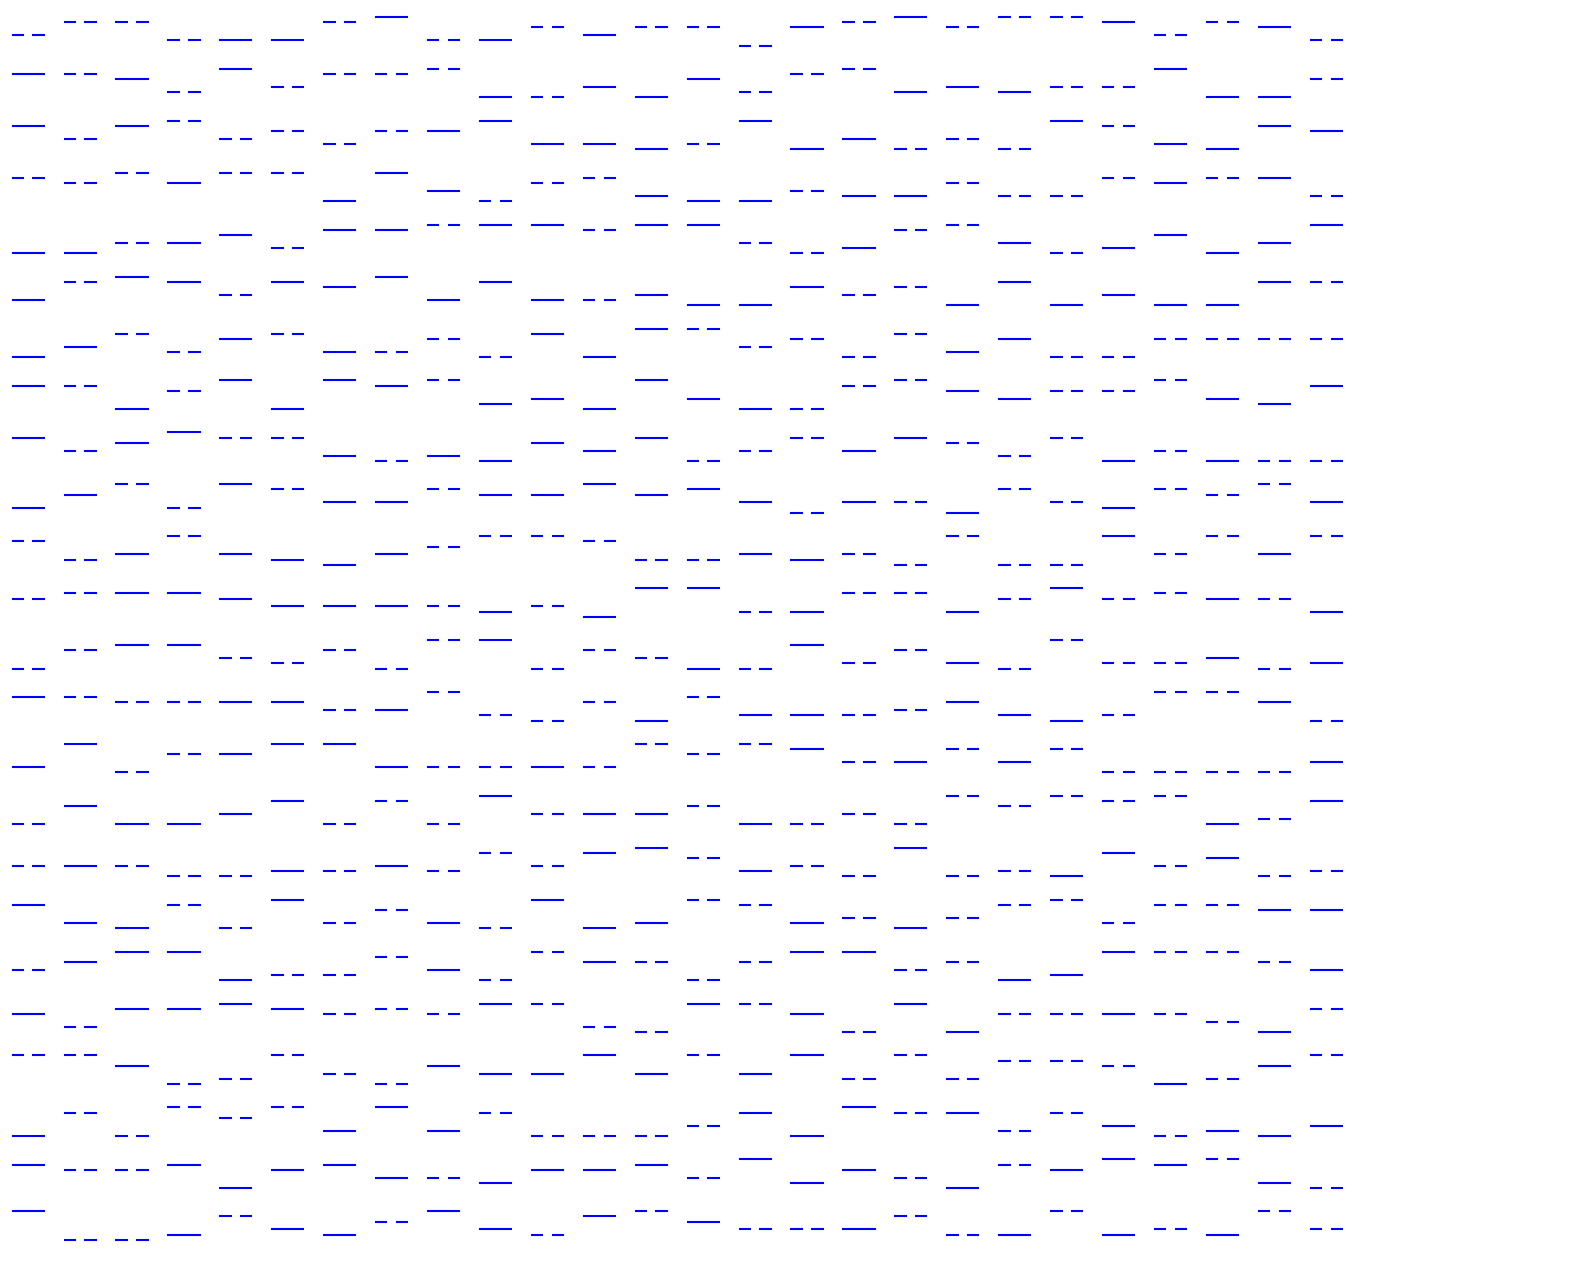

In [92]:
color_combos = list(permutations(color_data, 6))
random.shuffle(color_combos)

num_rows = 26
num_cols = 26
total_hexagram = num_rows * num_cols

print(
    f'''We have {len(color_combos)} color combos
We have {num_rows} rows x {num_cols} cols = {total_hexagram} total hexagrams''')

row_col_idx = ((row, col) for row in range(num_rows) for col in range(num_cols))

hexagrams = [
    Hexagram(
        row_idx=h_idx[0],
        col_idx=h_idx[1],
        colors=color_combos[h_full_idx],
    ) for h_full_idx, h_idx in enumerate(row_col_idx)
]

for c_idx, color in enumerate(color_data, start=1):
    for hexa in hexagrams:
        hexa.draw_hexagram(color_filter=color, reapeat_lines=1)

    plt.gca().set_aspect('equal')
    plt.axis([-.5, 298, -.5, 240])
    # plt.axis([-1, num_cols * hexa.x_gap_between_hexa+1, -1, num_rows * hexa.y_gap_between_hexa])
    plt.axis('off')
    plt.savefig(f'colorful_iching/{c_idx}_ichi_{color}.svg')
    plt.gcf().set_size_inches(20,20)
    plt.show()



We have 720 color combos
We have 20 rows x 20 cols = 400 total hexagrams


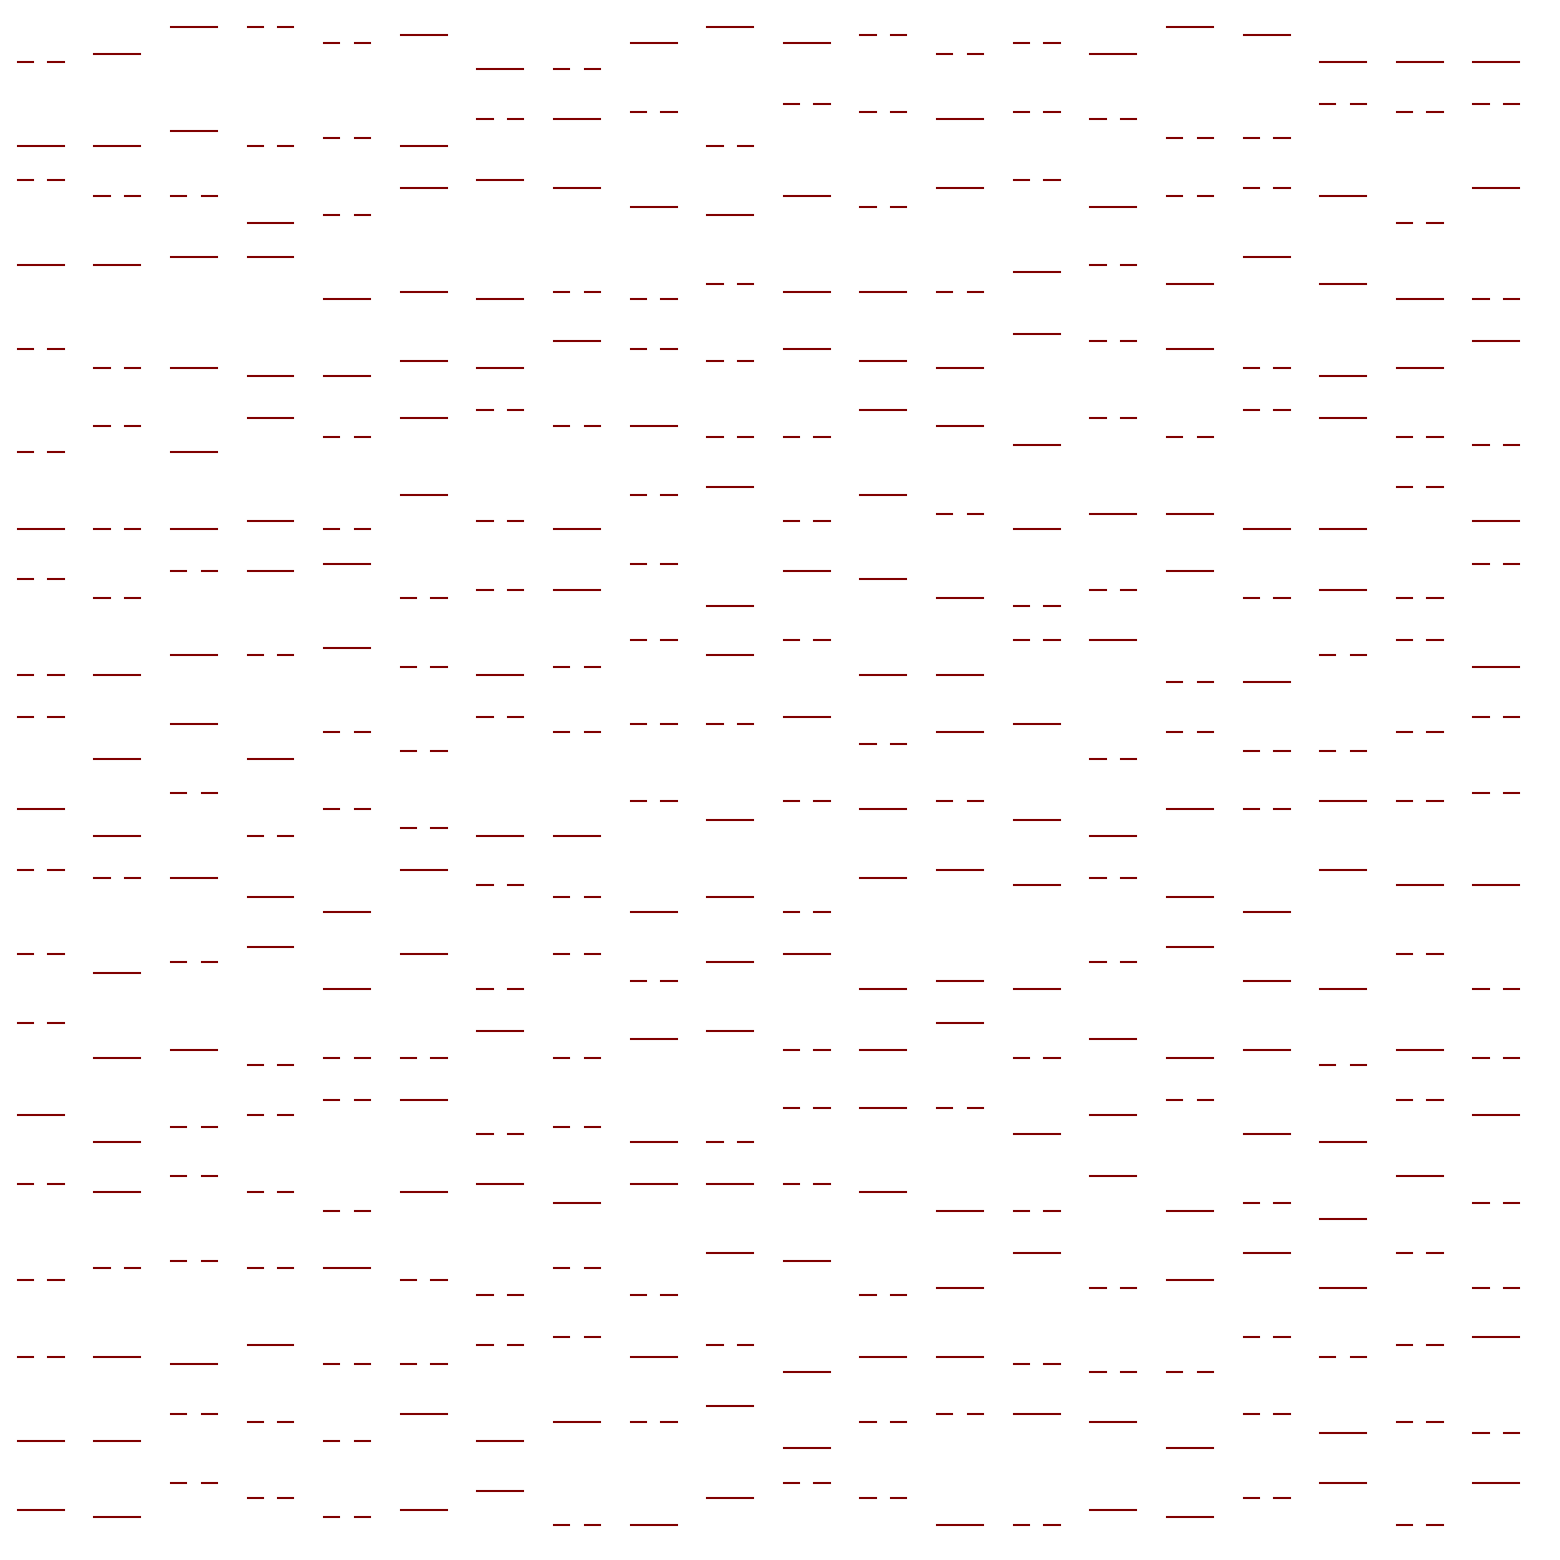

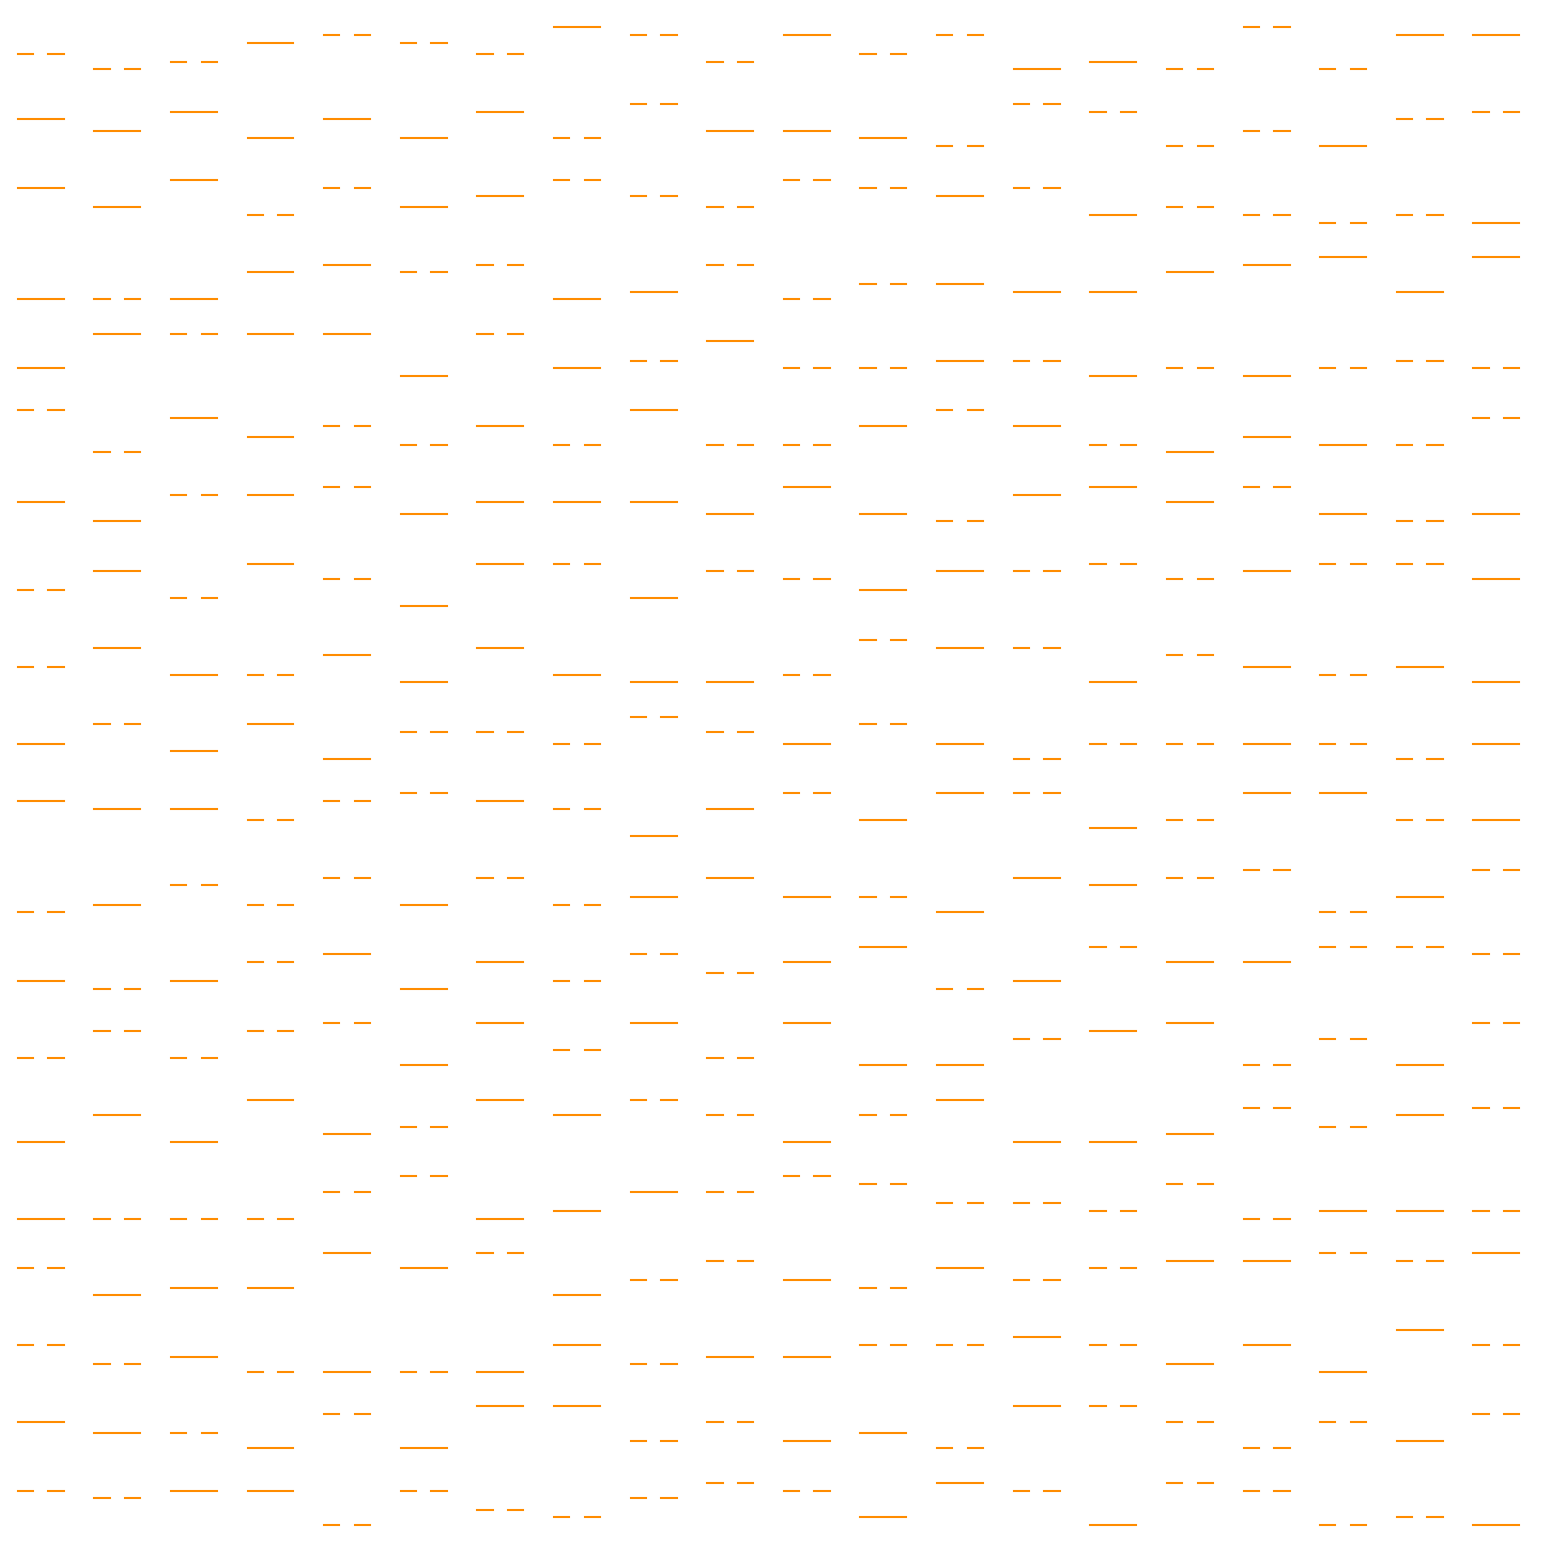

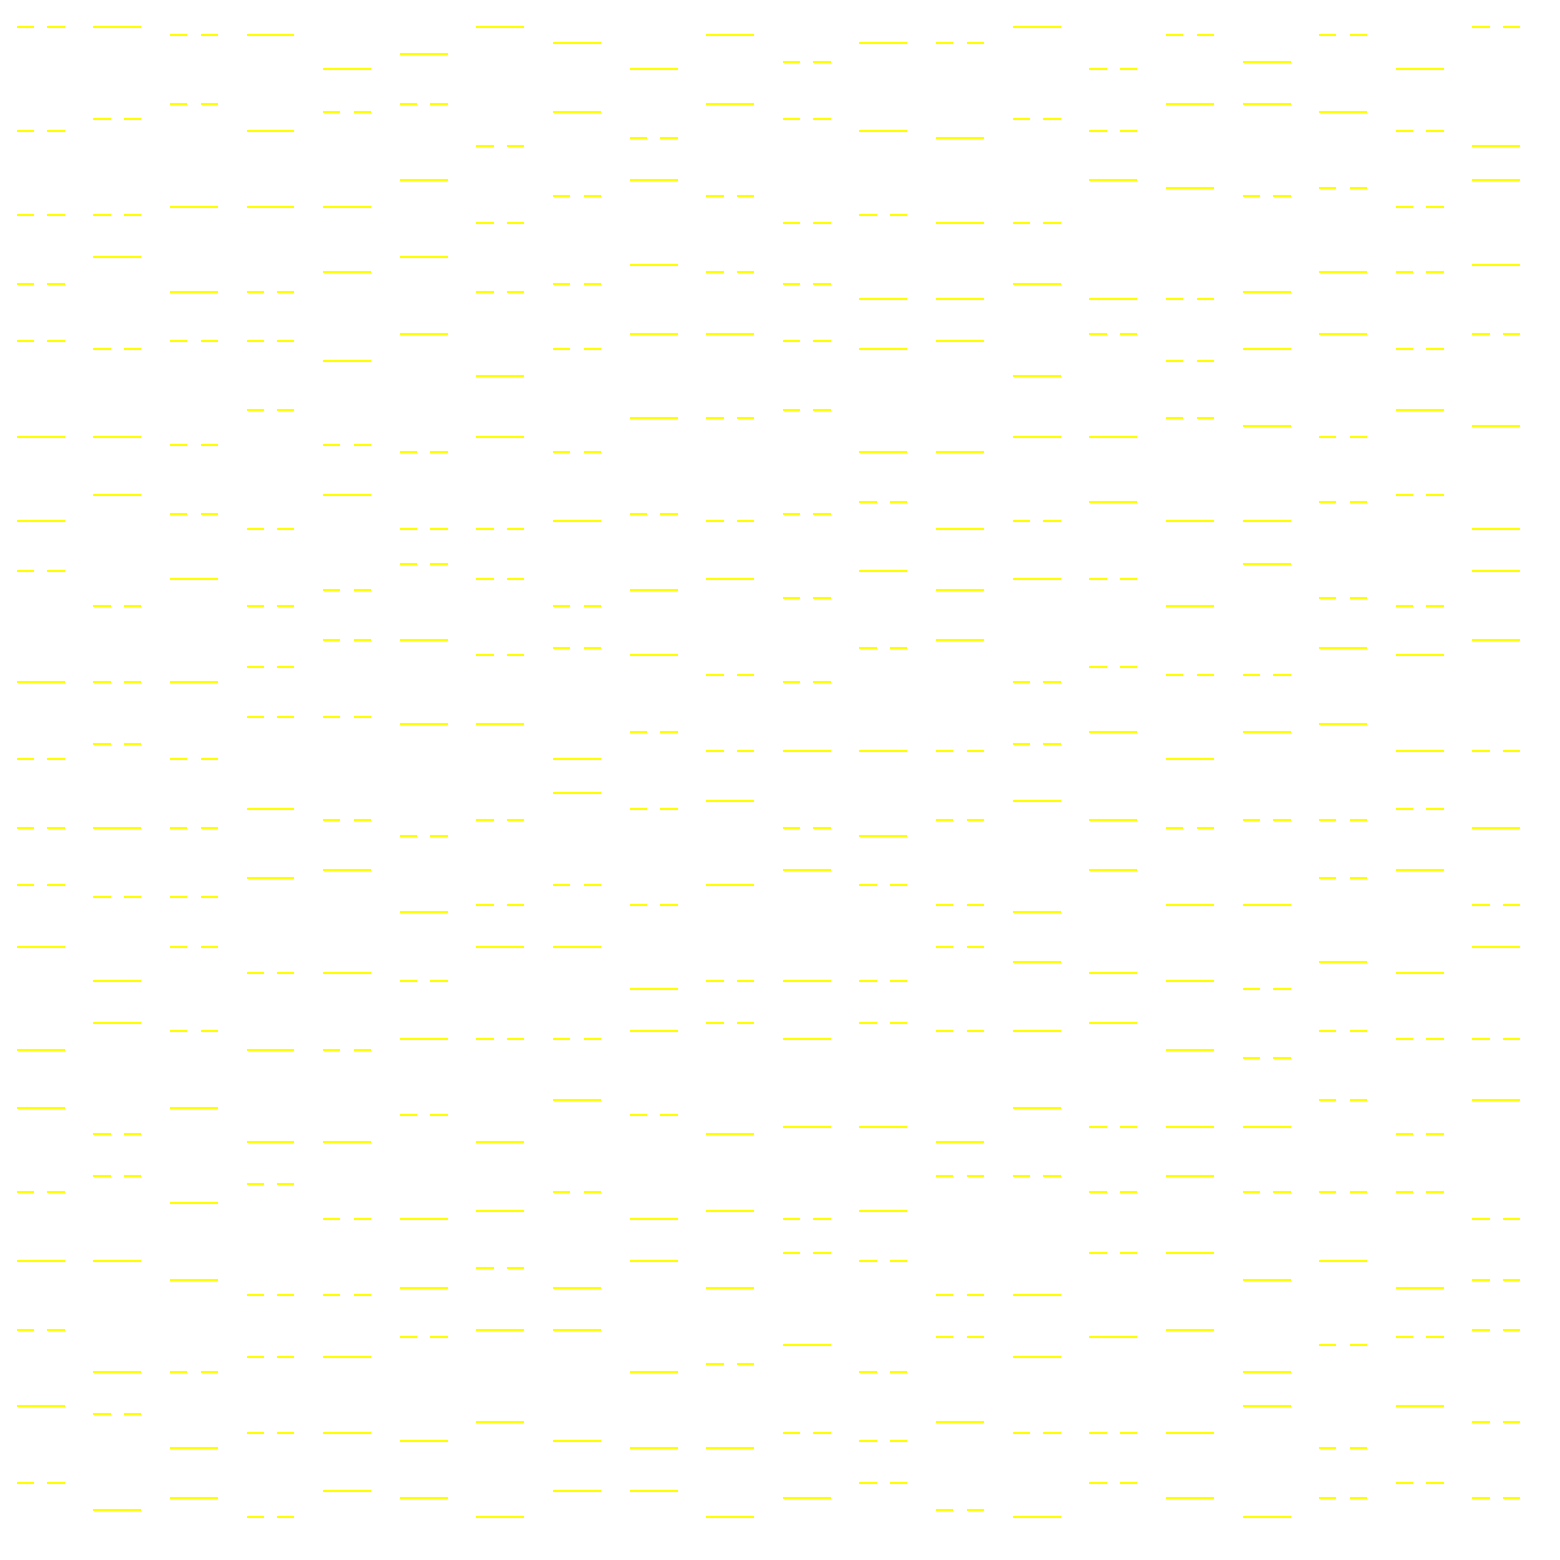

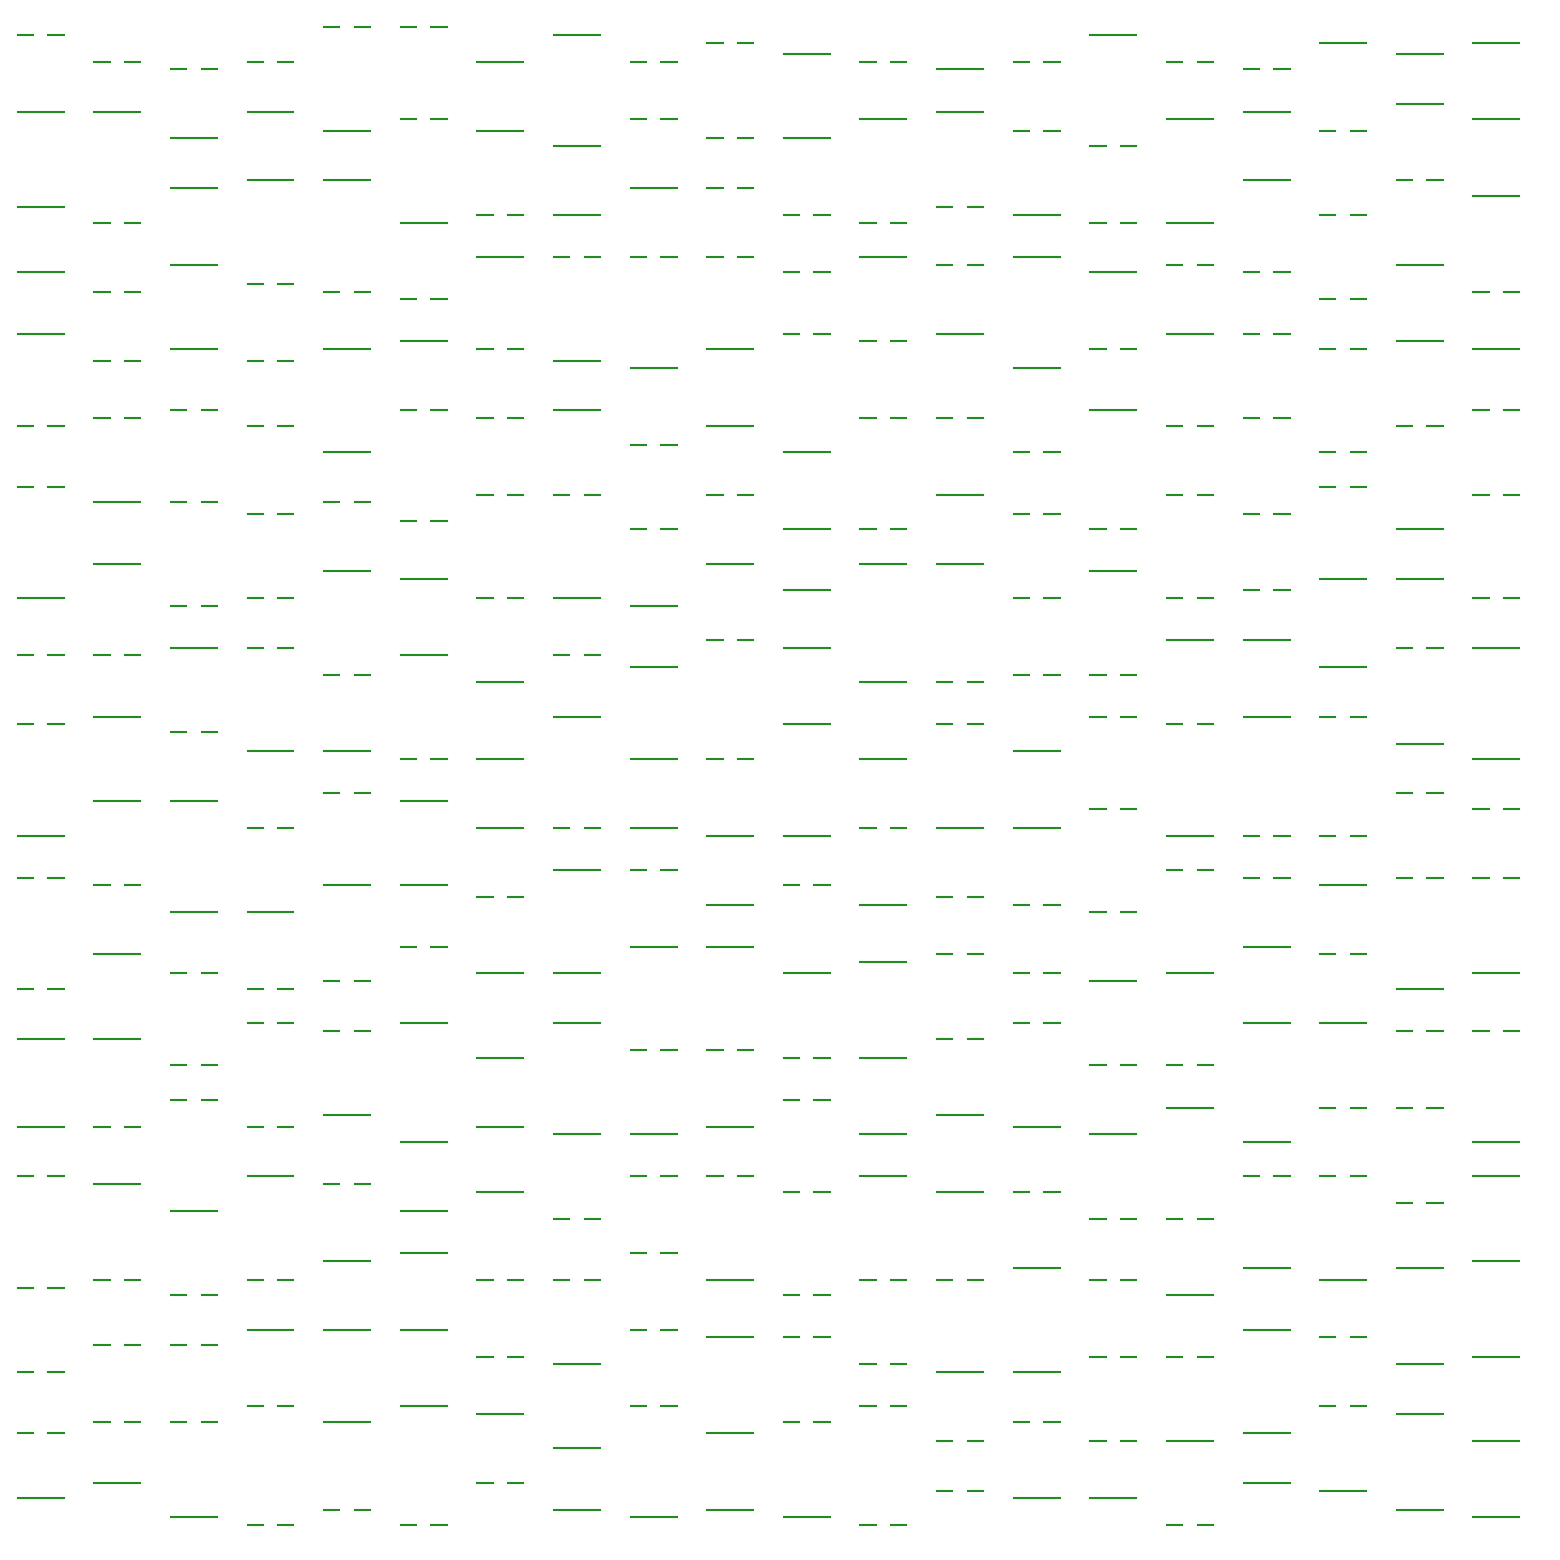

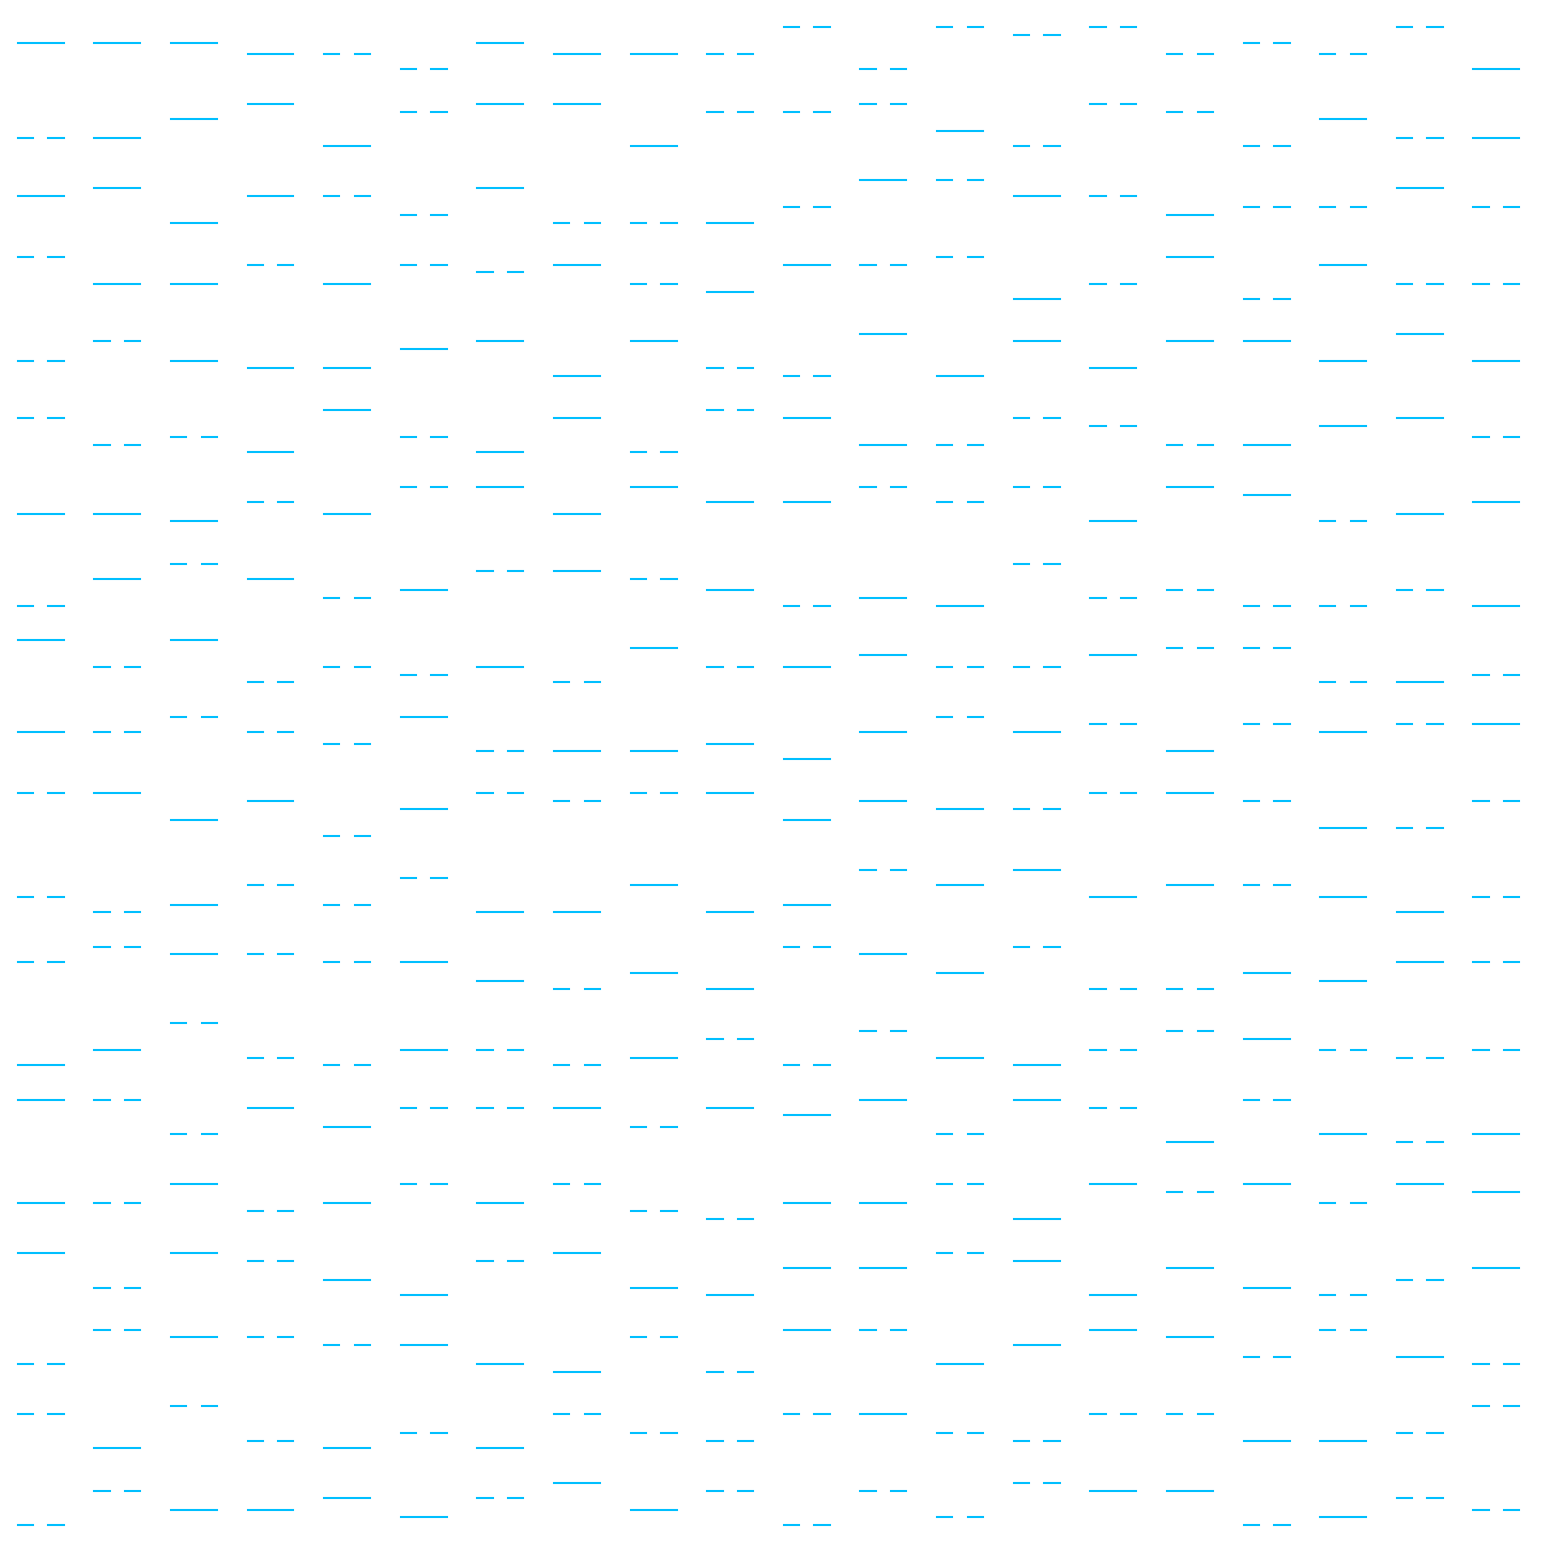

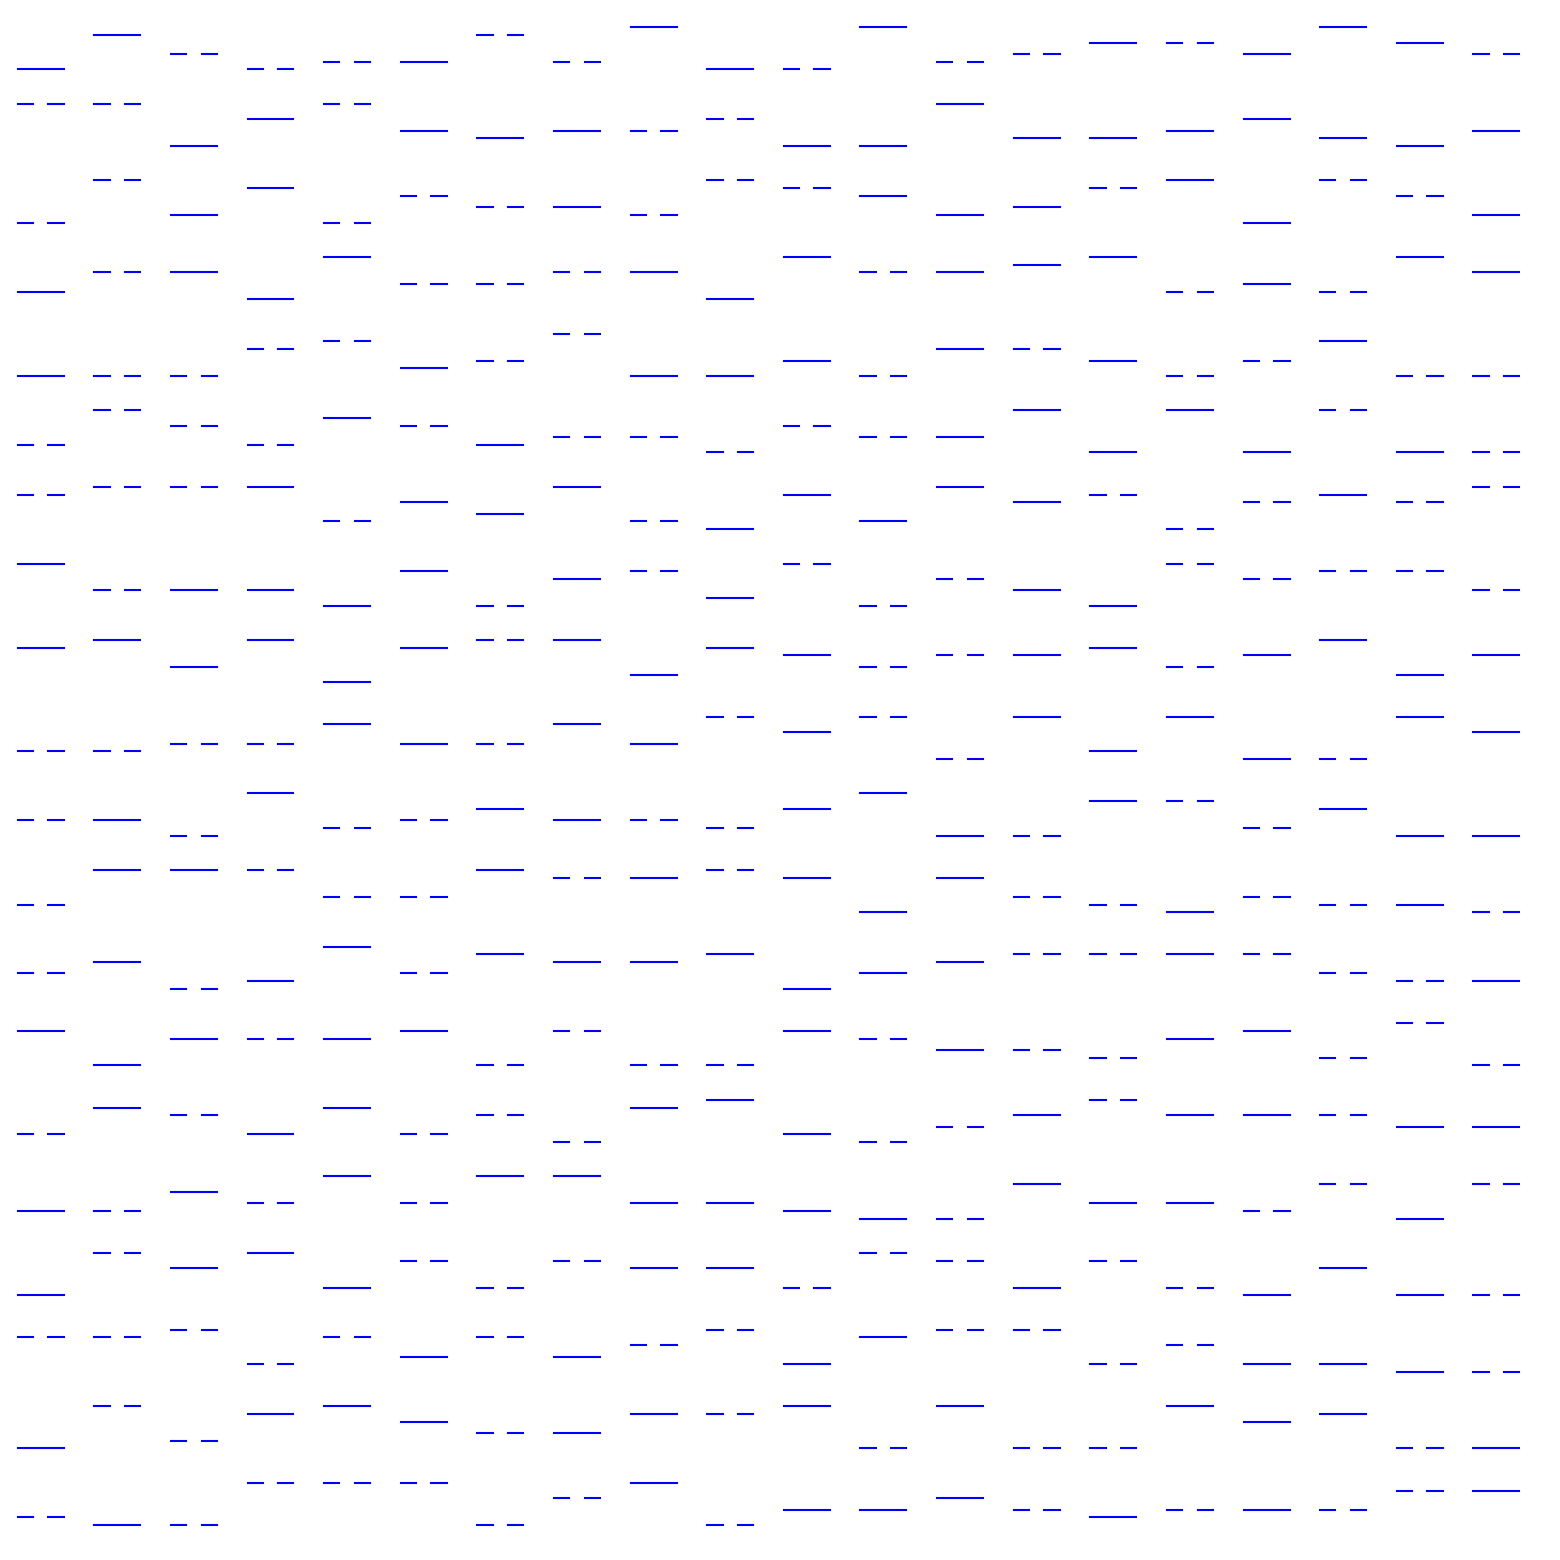

In [98]:
color_combos = list(permutations(color_data, 6))
random.shuffle(color_combos)

num_rows = 20
num_cols = 20
total_hexagram = num_rows * num_cols

print(
    f'''We have {len(color_combos)} color combos
We have {num_rows} rows x {num_cols} cols = {total_hexagram} total hexagrams''')

row_col_idx = ((row, col) for row in range(num_rows) for col in range(num_cols))

hexagrams = [
    Hexagram(
        row_idx=h_idx[0],
        col_idx=h_idx[1],
        colors=color_combos[h_full_idx],
    ) for h_full_idx, h_idx in enumerate(row_col_idx)
]

for c_idx, color in enumerate(color_data, start=1):
    for hexa in hexagrams:
        hexa.draw_hexagram(color_filter=color, reapeat_lines=1)

plt.gca().set_aspect('equal')
plt.axis([-1, 200, -1, 200])
# plt.axis([-1, num_cols * hexa.x_gap_between_hexa+1, -1, num_rows * hexa.y_gap_between_hexa])
plt.axis('off')
plt.savefig(f'colorful_iching/{c_idx}_ichi_{color}.svg')
plt.gcf().set_size_inches(20,20)
plt.show()

